In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn import neighbors
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [2]:
books = pd.read_csv("Books.csv",on_bad_lines='skip',encoding='utf-8')
books.shape

(135394, 8)

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings = pd.read_csv('Ratings (1).csv')
ratings.shape

(722126, 3)

In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [6]:
users = pd.read_csv('Users (1).csv',on_bad_lines='skip',encoding='latin')
users.shape

(278858, 3)

In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [10]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [11]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [12]:
book_ratings = pd.merge(left=books, right=ratings, how='left', left_on='ISBN', right_on='ISBN')
book_ratings.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating'],
      dtype='object')

In [13]:
book_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0


In [14]:
book_ratings.shape

(552222, 10)

In [15]:
book_ratings.isnull().sum().sum()

29353

In [16]:
book_ratings = book_ratings.dropna()
book_ratings.shape

(537544, 10)

In [17]:
book_ratings_users = pd.merge(left=book_ratings, right=users, how='right', left_on='User-ID', right_on='User-ID')
book_ratings_users.shape

(762664, 12)

In [18]:
book_ratings_users_t = book_ratings_users.copy()
book_ratings_users_t.describe()

,Year-Of-Publication,User-ID,Book-Rating,Age
count,537544.000000,762664.000000,537544.000000,528298.000000
mean,1969.348373,103867.365942,2.985452,36.607513
std,228.176636,70170.536606,3.908013,14.249687
min,0.000000,1.000000,0.000000,0.000000
25%,1992.000000,43920.000000,0.000000,27.000000
50%,1997.000000,95932.000000,0.000000,34.000000
75%,2001.000000,150498.000000,7.000000,45.000000
max,2050.000000,278858.000000,10.000000,244.000000


In [19]:
book_ratings_users_t = book_ratings_users.copy()
book_ratings_users_t.drop(book_ratings_users_t.describe(),axis='columns').describe()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location
count,537544,537544,537544,537544,537544,537544,537544,762664
unique,120716,109038,48553,8911,120651,120651,120651,57339
top,0971880107,Wild Animus,Stephen King,Ballantine Books,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"n/a, n/a, n/a"
freq,1561,1561,6048,20372,1561,1561,1561,8918


In [20]:
print("Percentage of null values in each field")

for column in book_ratings_users.columns:
    print(column," has ",np.round(book_ratings_users[column].isnull().mean()*100,2),"% of null values") 


Percentage of null values in each field
ISBN  has  29.52 % of null values
Book-Title  has  29.52 % of null values
Book-Author  has  29.52 % of null values
Year-Of-Publication  has  29.52 % of null values
Publisher  has  29.52 % of null values
Image-URL-S  has  29.52 % of null values
Image-URL-M  has  29.52 % of null values
Image-URL-L  has  29.52 % of null values
User-ID  has  0.0 % of null values
Book-Rating  has  29.52 % of null values
Location  has  0.0 % of null values
Age  has  30.73 % of null values


In [21]:
book_ratings_users = book_ratings_users.dropna()

In [22]:
book_ratings_users.shape

(391617, 12)

In [23]:
book_ratings_users.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [24]:
user_id_dict = {'User-ID':int}
book_ratings_users = book_ratings_users.astype(user_id_dict)

In [25]:
book_ratings_users = book_ratings_users.reset_index().drop('index',axis=1)

In [26]:
#book_ratings_users = book_ratings_users.drop('level_0',axis=1)
book_ratings_users.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0.0,"stockton, california, usa",18.0
1,1841721522,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001.0,Ryland Peters &amp; Small Ltd,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,10,0.0,"albacete, wisconsin, spain",26.0
2,0375759778,Prague : A Novel,ARTHUR PHILLIPS,2003.0,Random House Trade Paperbacks,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,19,7.0,"weston, ,",14.0
3,0425163091,Chocolate Jesus,Stephan Jaramillo,1998.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...,20,0.0,"langhorne, pennsylvania, usa",19.0
4,067176537X,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979.0,Fireside,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,36,0.0,"montreal, quebec, canada",24.0


Text(0.5, 1.0, 'Distribution of Ratings')

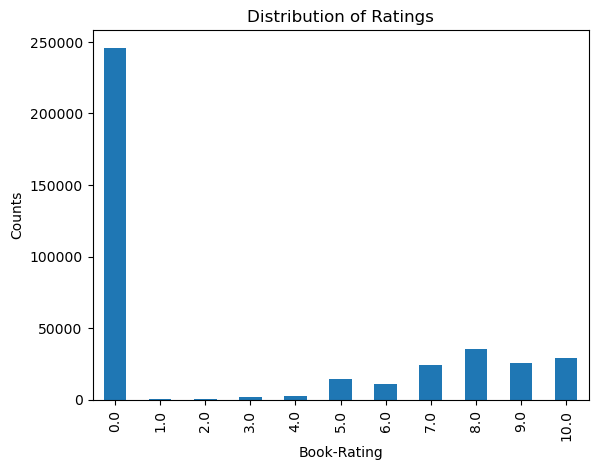

In [27]:
import matplotlib.pyplot as plt


book_ratings_users.groupby('Book-Rating')['ISBN'].count().plot.bar()
plt.xlabel("Book-Rating")
plt.ylabel("Counts")
plt.title("Distribution of Ratings")

In [28]:
#Popular 20 Books
print("################# Book Title #################  ################# Ratings ######################")
book_ratings_users.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)[:20]

################# Book Title #################  ################# Ratings ######################


Book-Title
Wild Animus                                                         1344
The Lovely Bones: A Novel                                            589
The Da Vinci Code                                                    455
The Nanny Diaries: A Novel                                           373
Bridget Jones's Diary                                                369
The Secret Life of Bees                                              356
Angels &amp; Demons                                                  349
Divine Secrets of the Ya-Ya Sisterhood: A Novel                      330
A Painted House                                                      324
Life of Pi                                                           318
The Red Tent (Bestselling Backlist)                                  294
The Girls' Guide to Hunting and Fishing                              270
Harry Potter and the Chamber of Secrets (Book 2)                     270
The Pelican Brief                       

Text(0.5, 1.0, 'Count of Ratings of Popular Books')

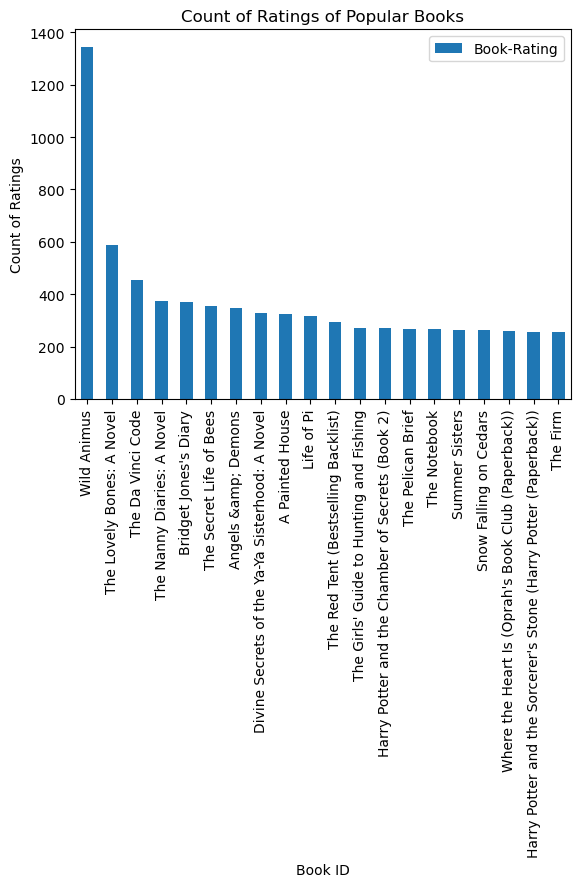

In [29]:
book_ratings_users.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)[:20].plot.bar()
plt.xlabel("Book ID")
plt.ylabel("Count of Ratings")
plt.legend()
plt.title("Count of Ratings of Popular Books")

In [30]:
book_ratings_users_1 = book_ratings_users.copy()
book_ratings_users_1 = book_ratings_users_1[book_ratings_users_1['Book-Rating']>6]
popular_authors = book_ratings_users_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:20].index
popular_authors

Index(['Stephen King', 'Nora Roberts', 'John Grisham', 'James Patterson',
       'J. K. Rowling', 'Dean R. Koontz', 'Janet Evanovich',
       'Mary Higgins Clark', 'Dan Brown', 'Anne Rice', 'Sue Grafton',
       'Nicholas Sparks', 'Michael Crichton', 'Alice Sebold', 'JOHN GRISHAM',
       'Terry Pratchett', 'Neil Gaiman', 'Barbara Kingsolver',
       'Anne McCaffrey', 'Tom Clancy'],
      dtype='object', name='Book-Author')

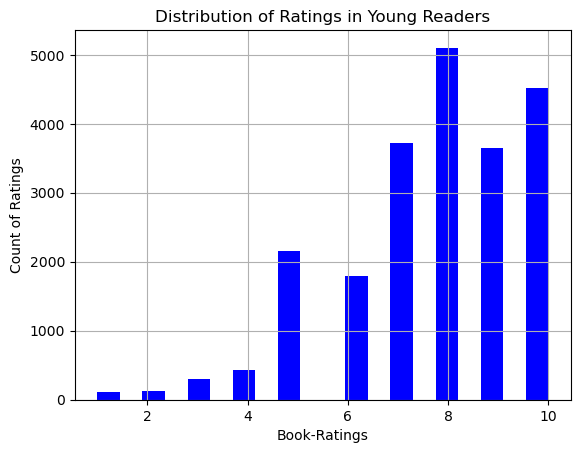

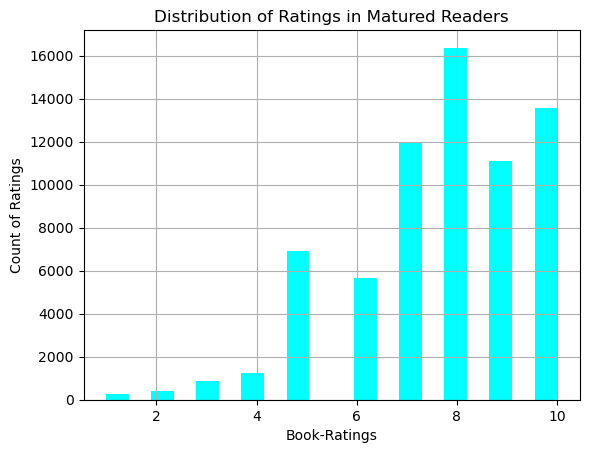

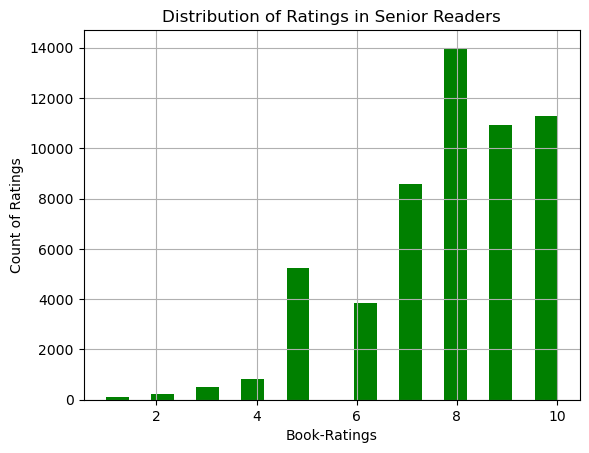

In [31]:
book_ratings_users_2 = book_ratings_users.copy()
book_ratings_users_2 = book_ratings_users_2[book_ratings_users_2['Book-Rating']!=0]
young_readers = book_ratings_users_2[book_ratings_users_2['Age']<25]
matured_readers = book_ratings_users_2[(book_ratings_users_2['Age']>=25) & (book_ratings_users_2['Age']<40)]
senior_readers = book_ratings_users_2[book_ratings_users_2['Age']>=40]

young_readers['Book-Rating'].hist(bins=20,color="blue")
plt.xlabel("Book-Ratings")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Ratings in Young Readers")
plt.show()

matured_readers['Book-Rating'].hist(bins=20,color="cyan")
plt.xlabel("Book-Ratings")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Ratings in Matured Readers")
plt.show()

senior_readers['Book-Rating'].hist(bins=20,color="green")
plt.xlabel("Book-Ratings")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Ratings in Senior Readers")
plt.show()

Top 5 Authors' Book Ratings distribution among young readers


c:\Users\chell\..anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


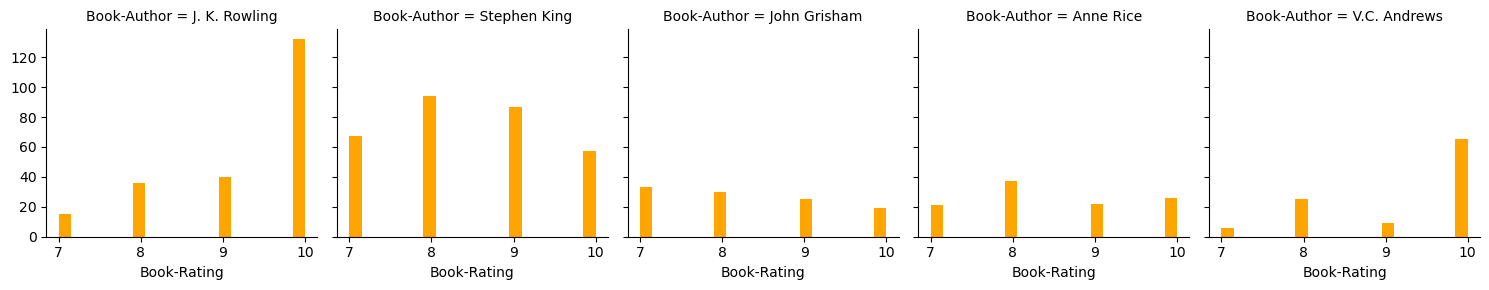

In [32]:
young_readers_1 = young_readers.copy()
young_readers_1 = young_readers_1[young_readers_1['Book-Rating']>6]
popular_authors_young = young_readers_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among young readers")
young_readers_1 = young_readers_1[young_readers_1['Book-Author'].isin(popular_authors_young)]
graph = sns.FacetGrid(young_readers_1,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=20,color='orange')
plt.show()



Top 5 Authors' Book Ratings distribution among matured readers


c:\Users\chell\..anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


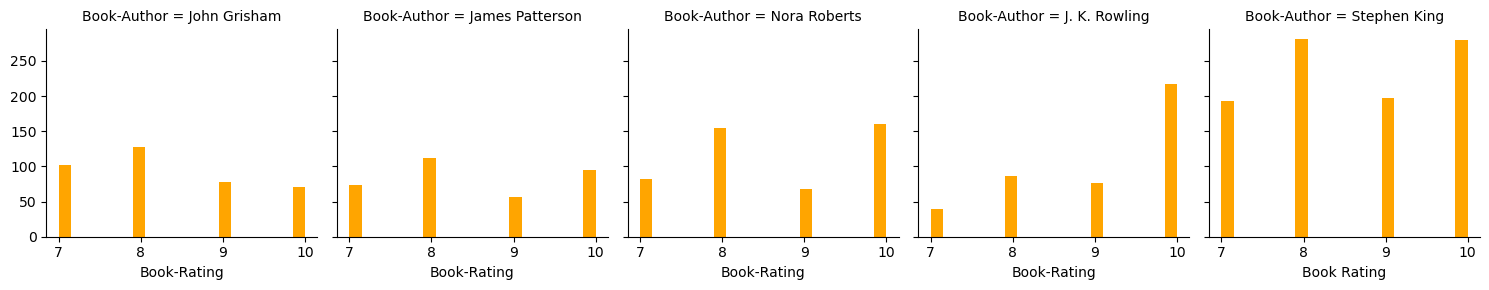

In [33]:
matured_readers_1 = matured_readers.copy()
matured_readers_1 = matured_readers_1[matured_readers_1['Book-Rating']>6]
popular_authors_matured = matured_readers_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among matured readers")
matured_readers_1 = matured_readers_1[matured_readers_1['Book-Author'].isin(popular_authors_matured)]
graph = sns.FacetGrid(matured_readers_1,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=20,color='orange')
plt.xlabel("Book Rating")
plt.ylabel("Counts of Ratings")
plt.show()




Top 5 Authors' Book Ratings distribution among senior readers


c:\Users\chell\..anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


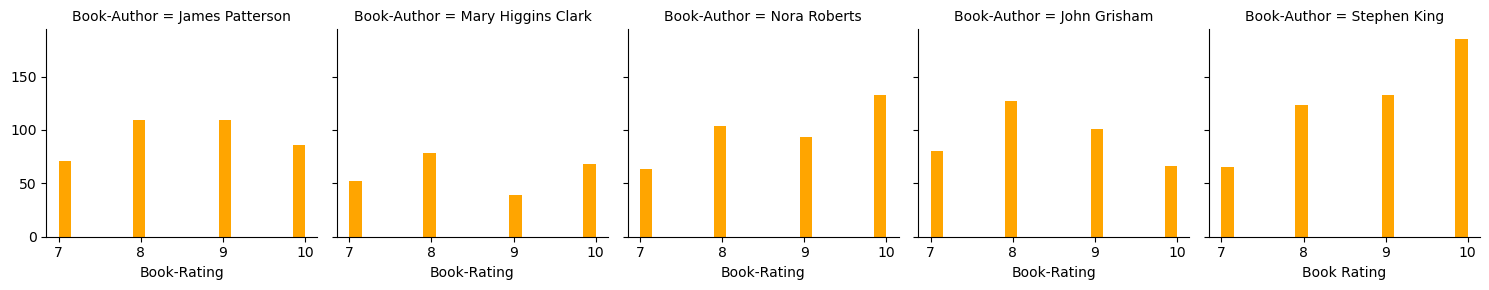

In [34]:
senior_readers_1 = senior_readers.copy()
senior_readers_1 = senior_readers_1[senior_readers_1['Book-Rating']>6]
popular_authors_senior = senior_readers_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among senior readers")
senior_readers_1 = senior_readers_1[senior_readers_1['Book-Author'].isin(popular_authors_senior)]
graph = sns.FacetGrid(senior_readers_1,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=20,color='orange')
plt.xlabel("Book Rating")
plt.ylabel("Counts of Ratings")
plt.show()




Top 10 Publishers' Book Ratings distribution


c:\Users\chell\..anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


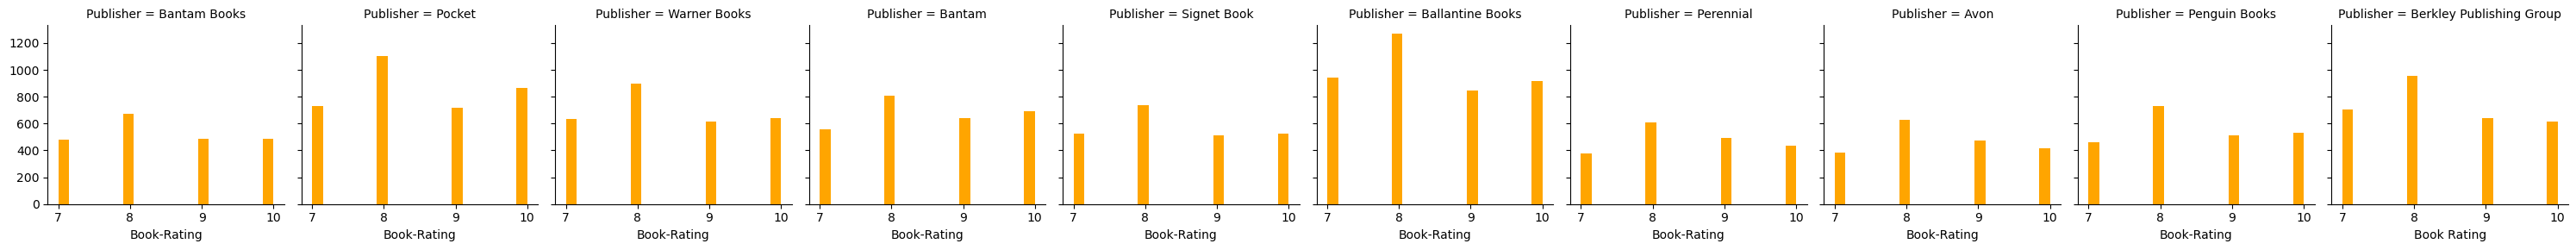

In [35]:
book_ratings_users_1 = book_ratings_users.copy()
book_ratings_users_1 = book_ratings_users_1[book_ratings_users_1['Book-Rating']>6]
popular_publishers = book_ratings_users_1.groupby('Publisher')['ISBN'].count().sort_values(ascending=False)[:10].index

print("Top 10 Publishers' Book Ratings distribution")
book_ratings_users_1 = book_ratings_users_1[book_ratings_users_1['Publisher'].isin(popular_publishers)]
graph = sns.FacetGrid(book_ratings_users_1,col='Publisher')
graph.map(plt.hist,'Book-Rating',bins=20,color='orange')
plt.xlabel("Book Rating")
plt.ylabel("Count of Ratings")
plt.show()

In [36]:
item_book_ratings = book_ratings_users.groupby(['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']).agg(ratings_count = ('User-ID','count'),avg_rating=('Book-Rating','mean')).round(2)
item_book_ratings = item_book_ratings.reset_index(level=['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'])
item_book_ratings.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'ratings_count', 'avg_rating'],
      dtype='object')

In [37]:
len(item_book_ratings)

106195

In [38]:
item_book_ratings = item_book_ratings[item_book_ratings['Book-Author']!='Not Applicable (Na )']

In [39]:
np.mean(item_book_ratings[['avg_rating']])

3.0224732145381217

In [40]:
np.mean(item_book_ratings[['ratings_count']])

3.6890719084818273

In [41]:
top_rated_books = item_book_ratings[(item_book_ratings['avg_rating']>2.82) & (item_book_ratings['ratings_count']>3.28)]
top_rated_books = top_rated_books.sort_values(by='avg_rating',ascending=False).head(20)
top_rated_books.head(2)

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating
32408,0395193958,The Lord of the Rings (Leatherette Collector's...,J. R. R. Tolkien,Houghton Mifflin Company,http://images.amazon.com/images/P/0395193958.0...,http://images.amazon.com/images/P/0395193958.0...,http://images.amazon.com/images/P/0395193958.0...,4,10.0
2617,0060909005,Collected Poems Reissue,Sylvia Plath,Perennial,http://images.amazon.com/images/P/0060909005.0...,http://images.amazon.com/images/P/0060909005.0...,http://images.amazon.com/images/P/0060909005.0...,4,10.0


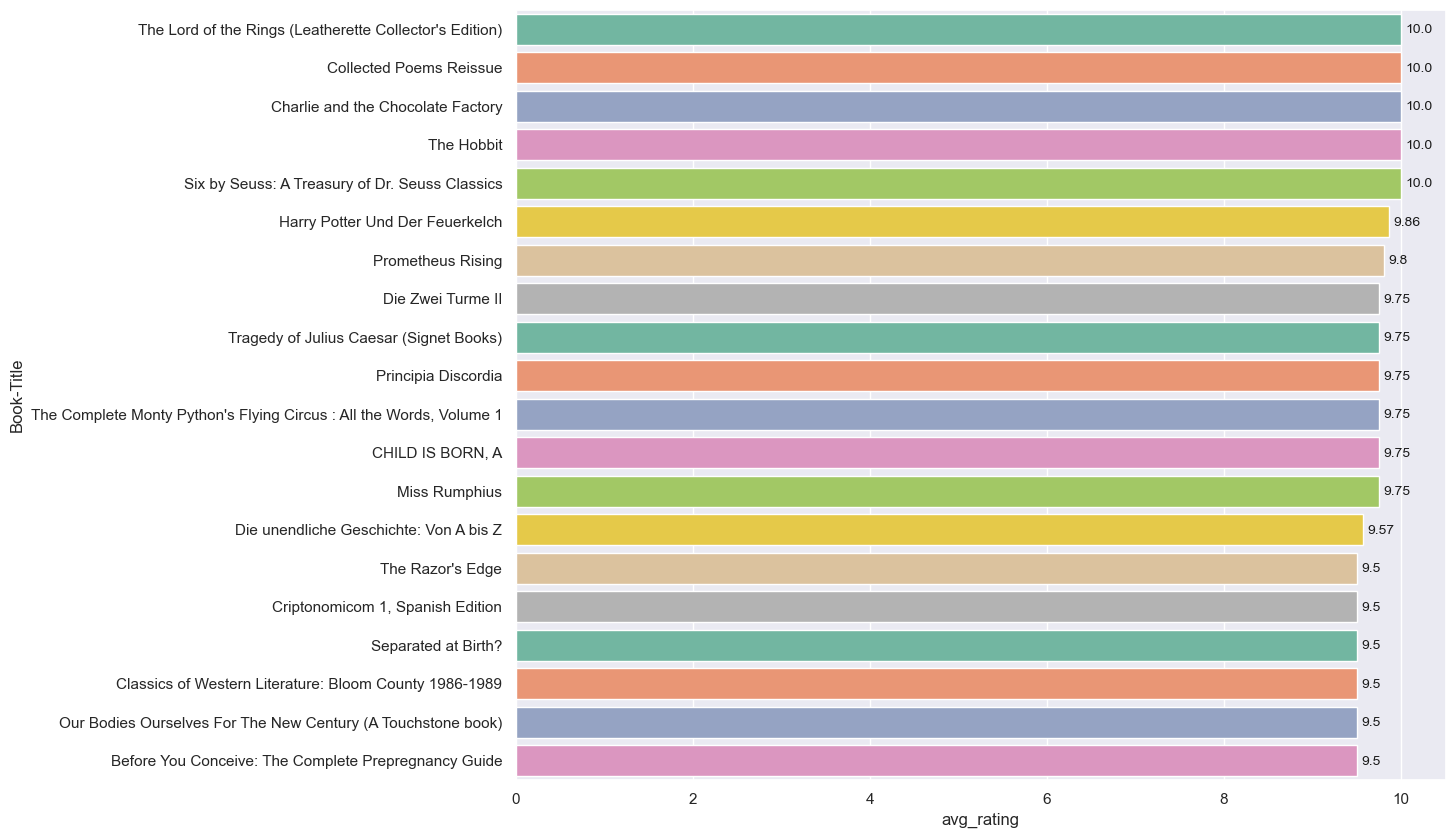

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='avg_rating',y='Book-Title',data=top_rated_books,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.show()

In [43]:
top_voted_books = item_book_ratings.sort_values(by='ratings_count',ascending=False).head(20)


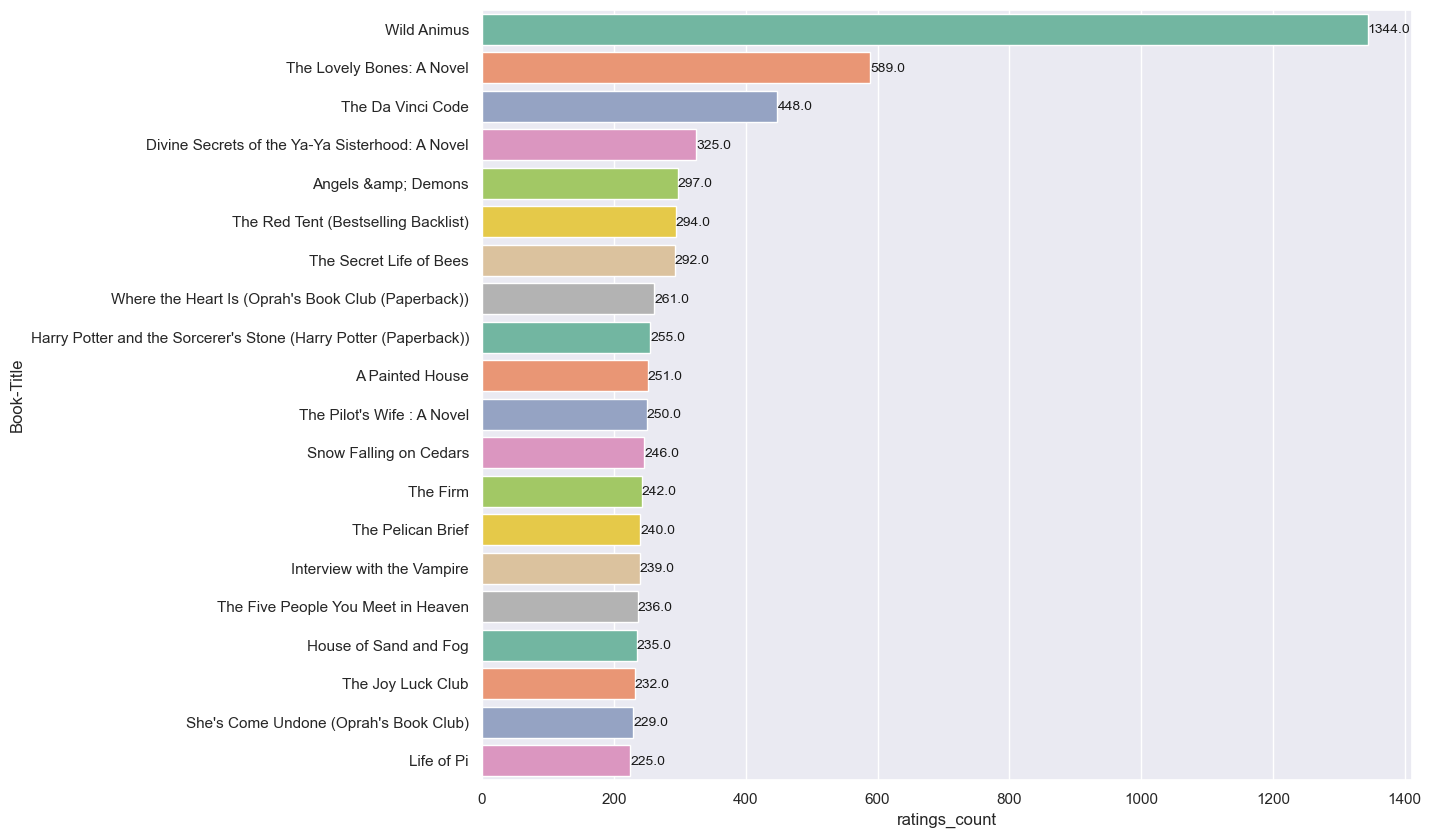

In [44]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='ratings_count',y='Book-Title',data=top_voted_books,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.show()

# Top Voted but not Top Rated

In [45]:
list(set(top_voted_books['Book-Title'])-set(top_rated_books['Book-Title']))

['The Firm',
 'Life of Pi',
 'A Painted House',
 'Wild Animus',
 'The Red Tent (Bestselling Backlist)',
 'The Pelican Brief',
 "The Pilot's Wife : A Novel",
 'House of Sand and Fog',
 'The Joy Luck Club',
 'The Secret Life of Bees',
 "Where the Heart Is (Oprah's Book Club (Paperback))",
 'Interview with the Vampire',
 'The Five People You Meet in Heaven',
 'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'The Da Vinci Code',
 "She's Come Undone (Oprah's Book Club)",
 'Angels &amp; Demons',
 'Snow Falling on Cedars',
 'The Lovely Bones: A Novel']

# Top Rated but not top Voted

In [46]:
list(set(top_rated_books['Book-Title'])-set(top_voted_books['Book-Title']))

['Die unendliche Geschichte: Von A bis Z',
 'Criptonomicom 1, Spanish Edition',
 'Separated at Birth?',
 'Before You Conceive: The Complete Prepregnancy Guide',
 'CHILD IS BORN, A',
 'Harry Potter Und Der Feuerkelch',
 "The Razor's Edge",
 'Classics of Western Literature: Bloom County 1986-1989',
 "The Complete Monty Python's Flying Circus : All the Words, Volume 1",
 "The Lord of the Rings (Leatherette Collector's Edition)",
 'Our Bodies Ourselves For The New Century (A Touchstone book)',
 'Die Zwei Turme II',
 'Prometheus Rising',
 'Charlie and the Chocolate Factory',
 'The Hobbit',
 'Principia Discordia',
 'Six by Seuss: A Treasury of Dr. Seuss Classics',
 'Tragedy of Julius Caesar (Signet Books)',
 'Miss Rumphius',
 'Collected Poems Reissue']

# Relationship between Rating and Vote

c:\Users\chell\..anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


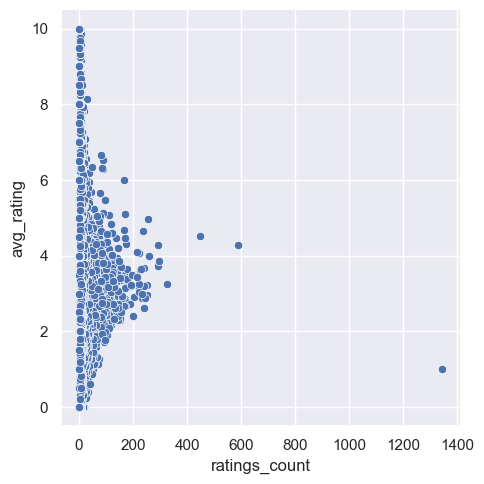

In [47]:
ax = sns.relplot(x='ratings_count',y='avg_rating',data= item_book_ratings,marker='o')

As the rating count increases the mean of ratings is getting in between 2 to 4

In [48]:
item_book_ratings['Book-Author'].unique()

array(['Aldous Huxley', 'Ellis Peters', 'Bill Bryson', ...,
       'Serge Normant', 'Rachel Abramowitz', 'Ken Kalfus'], dtype=object)

In [49]:
def get_only_author(authors):
    return authors.split('/')[0]

In [50]:
df_only_author = item_book_ratings.copy()

In [51]:
df_only_author['pr_author'] = df_only_author['Book-Author'].apply(lambda x: get_only_author(x))


In [52]:
len(df_only_author)

106121

In [53]:
total_rating = df_only_author.drop_duplicates(subset=['pr_author', 'Book-Title'], keep='first')
len(total_rating)

98871

In [54]:
total_ratings = df_only_author.groupby('pr_author').agg(total_ratings=('avg_rating','sum')).reset_index()
total_ratings = total_ratings.sort_values(by='total_ratings',ascending=False)
total_ratings

,pr_author,total_ratings
37941,Stephen King,1319.37
41914,William Shakespeare,1001.28
484,Agatha Christie,909.89
39378,Terry Pratchett,798.91
5649,Carolyn Keene,625.11
...,...,...
30141,Neil Astley,0.00
30142,Neil Bartlett,0.00
30143,Neil Bissoondath,0.00
30144,Neil Blandford,0.00


In [55]:
total_books = df_only_author.groupby('pr_author').agg(total_books=('Book-Title','nunique')).reset_index()
total_books = total_books.sort_values(by='total_books',ascending=False)
total_books

,pr_author,total_books
484,Agatha Christie,257
41914,William Shakespeare,235
37941,Stephen King,207
5649,Carolyn Keene,193
1935,Ann M. Martin,191
...,...,...
16476,Israel Finkelstein,1
16475,Israel,1
16473,Isolde Heyne,1
16472,Isoko Hatano,1


In [56]:
np.max(total_books['total_books'])

257

In [57]:
avg_r_by_author = pd.merge(total_ratings, total_books, on = 'pr_author', how ='outer')
avg_r_by_author = avg_r_by_author[avg_r_by_author['total_books']>150]
avg_r_by_author['avg_rat_by_a'] = np.round(avg_r_by_author['total_ratings']/avg_r_by_author['total_books'],2)
avg_r_by_author = avg_r_by_author.sort_values(by='avg_rat_by_a',ascending=False)
avg_r_by_author

,pr_author,total_ratings,total_books,avg_rat_by_a
0,Stephen King,1319.37,207,6.37
1,William Shakespeare,1001.28,235,4.26
2,Agatha Christie,909.89,257,3.54
4,Carolyn Keene,625.11,193,3.24
5,Nora Roberts,515.85,160,3.22
37,Francine Pascal,235.96,161,1.47
42,R. L. Stine,220.60,164,1.35
50,Ann M. Martin,210.65,191,1.10


# Weighted Rating Calculation

In [58]:
total_vote = df_only_author.drop_duplicates(subset=['pr_author', 'Book-Title'], keep='first')
total_vote.reset_index(inplace=True)
total_vote = total_vote[['pr_author', 'Book-Title', 'avg_rating', 'ratings_count']]
total_vote

,pr_author,Book-Title,avg_rating,ratings_count
0,Aldous Huxley,Brave New World,9.0,1
1,Ellis Peters,Monk's-hood,7.5,2
2,Bill Bryson,Made in America,8.0,1
3,J. R. R. Tolkien,Farmer Giles of Ham: And Other Stories,8.0,2
4,Mandy Stanley,Babe Dressing,10.0,1
...,...,...,...,...
98866,Robb Forman Dew,"Evidence Against Her, The",0.0,1
98867,T. Coraghessan Boyle,After the Plague: And Other Stories,0.0,1
98868,Ken Follett,Hornet Flight: A Novel,8.0,1
98869,Arthur C. Clarke,Time's Eye,0.0,1


In [59]:
C = total_vote.avg_rating.mean()
C

3.0326537609612525

In [60]:
m = total_vote.ratings_count.quantile(0.9998)
m

192.2259999999951

In [61]:
total_vote = total_vote[total_vote.ratings_count>=m]
total_vote.head()

,pr_author,Book-Title,avg_rating,ratings_count
2750,Rebecca Wells,Divine Secrets of the Ya-Ya Sisterhood: A Novel,3.26,325
2788,Barbara Kingsolver,The Poisonwood Bible: A Novel,3.20,220
3176,Rebecca Wells,Little Altars Everywhere: A Novel,3.20,193
8324,Sue Monk Kidd,The Secret Life of Bees,4.29,292
11784,Anita Diamant,The Red Tent (Bestselling Backlist),3.74,294


In [62]:
def weighted_rating(x, m=m, C=C):
    v = x['ratings_count']
    R = x['avg_rating']
    return np.round(((v * R) + (m * C))/(m + v),2)

In [63]:
total_vote['weighted_rating'] = total_vote.apply(weighted_rating,axis=1)

C:\Users\chell\AppData\Local\Temp\ipykernel_21848\1151498035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_vote['weighted_rating'] = total_vote.apply(weighted_rating,axis=1)


In [64]:
total_vote = total_vote.sort_values(by='weighted_rating',ascending=False).head(20)
total_vote.head()

,pr_author,Book-Title,avg_rating,ratings_count,weighted_rating
50705,J. K. Rowling,Harry Potter and the Sorcerer's Stone (Harry P...,4.97,255,4.14
29310,Dan Brown,The Da Vinci Code,4.52,448,4.07
14829,Alice Sebold,The Lovely Bones: A Novel,4.29,589,3.98
67343,Mitch Albom,The Five People You Meet in Heaven,4.64,236,3.92
8324,Sue Monk Kidd,The Secret Life of Bees,4.29,292,3.79


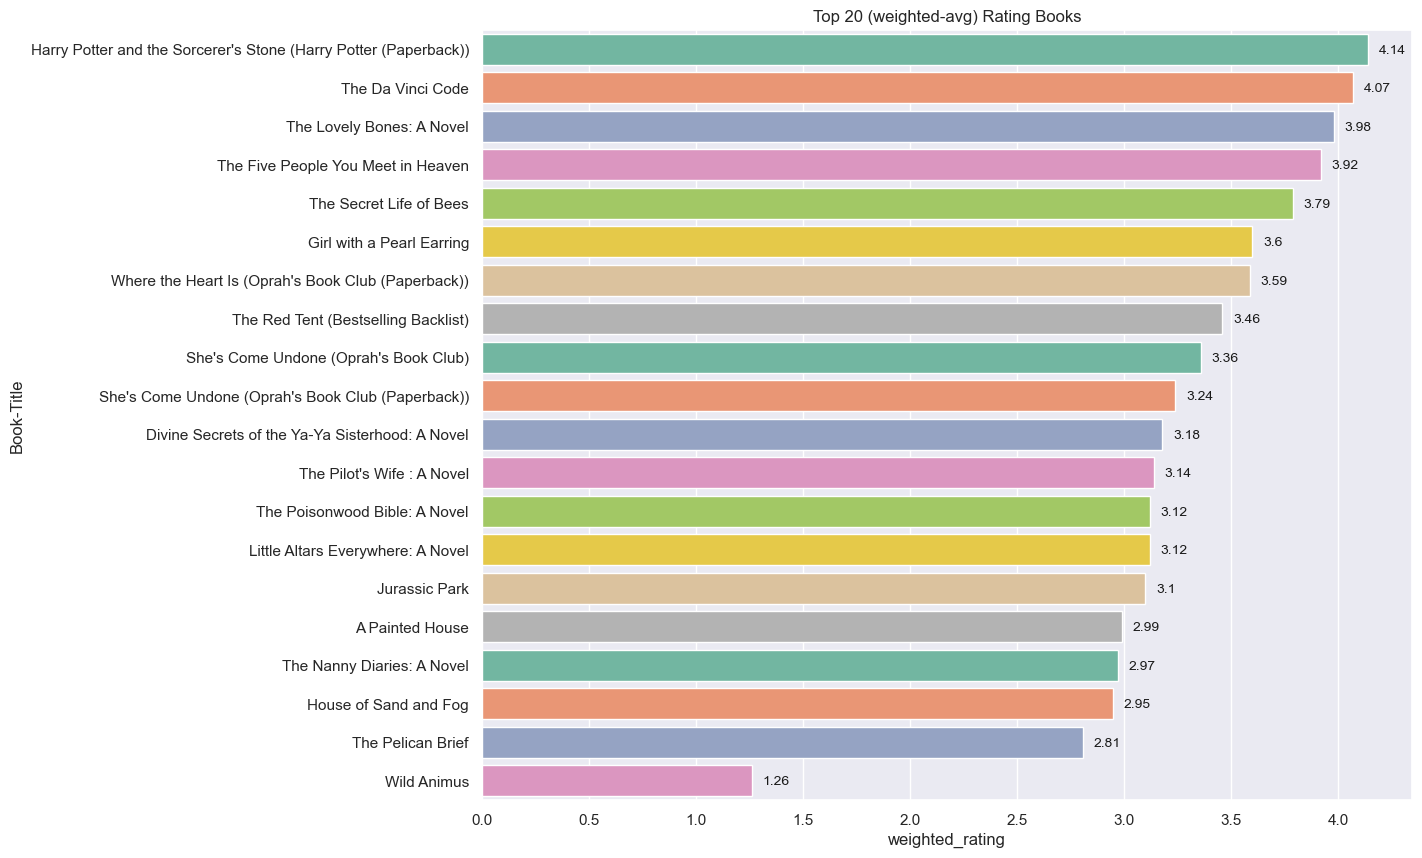

In [65]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='weighted_rating',y='Book-Title',data=total_vote,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.title("Top 20 (weighted-avg) Rating Books")
plt.show()

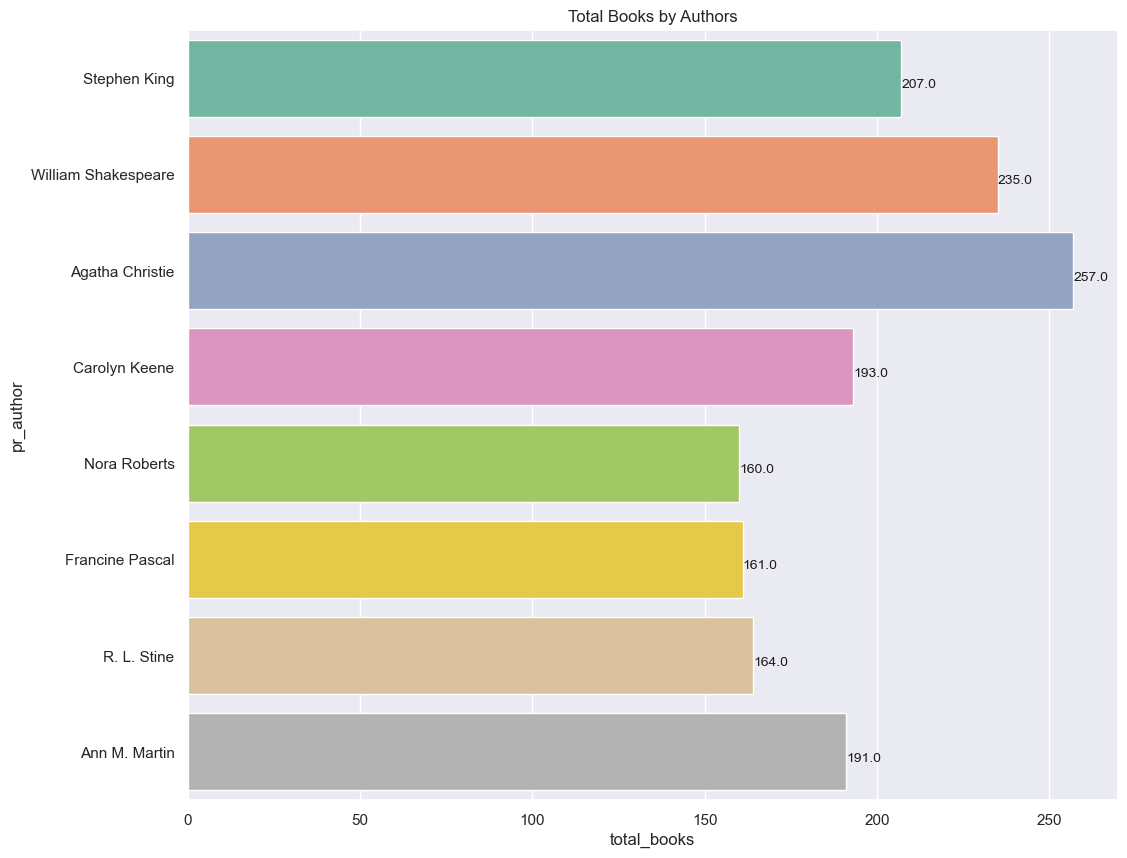

In [66]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='total_books',y='pr_author',data=avg_r_by_author,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.title("Total Books by Authors")
plt.show()

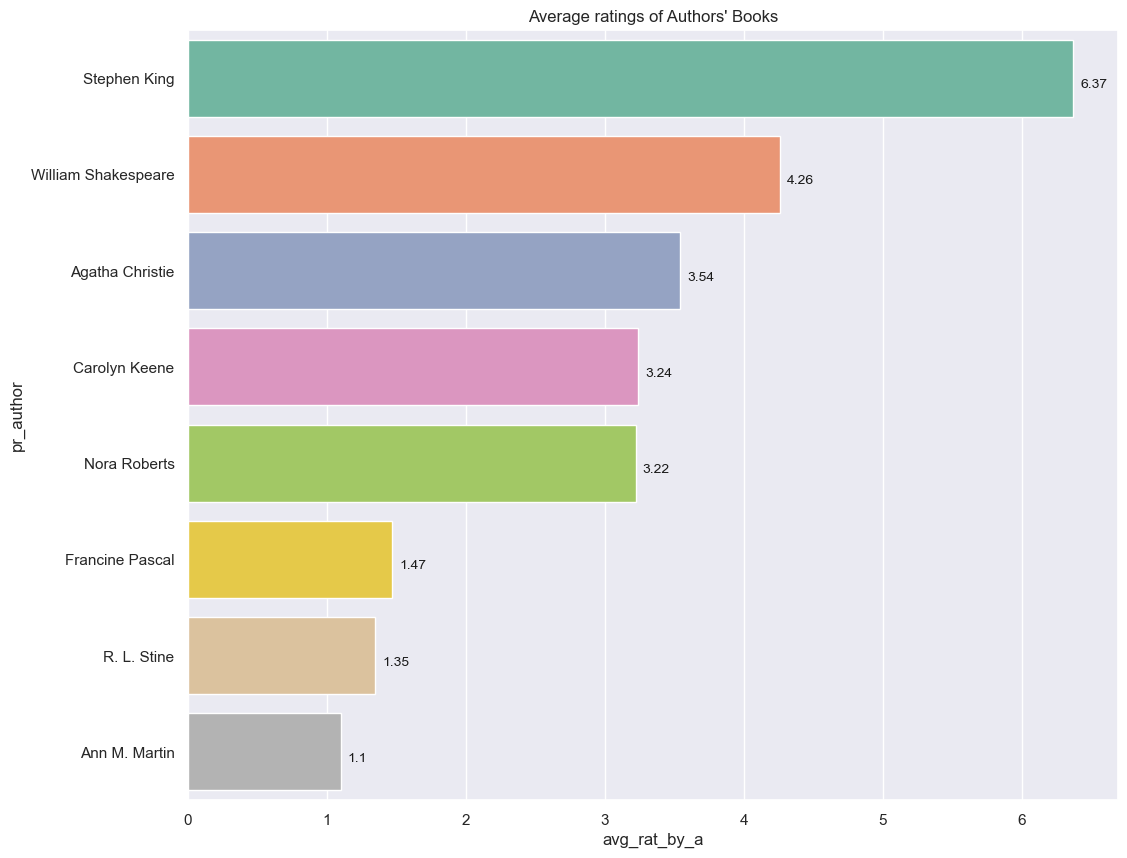

In [67]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='avg_rat_by_a',y='pr_author',data=avg_r_by_author,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.title("Average ratings of Authors' Books")
plt.show()

In [68]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [69]:
titles = item_book_ratings['Book-Title'].unique()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

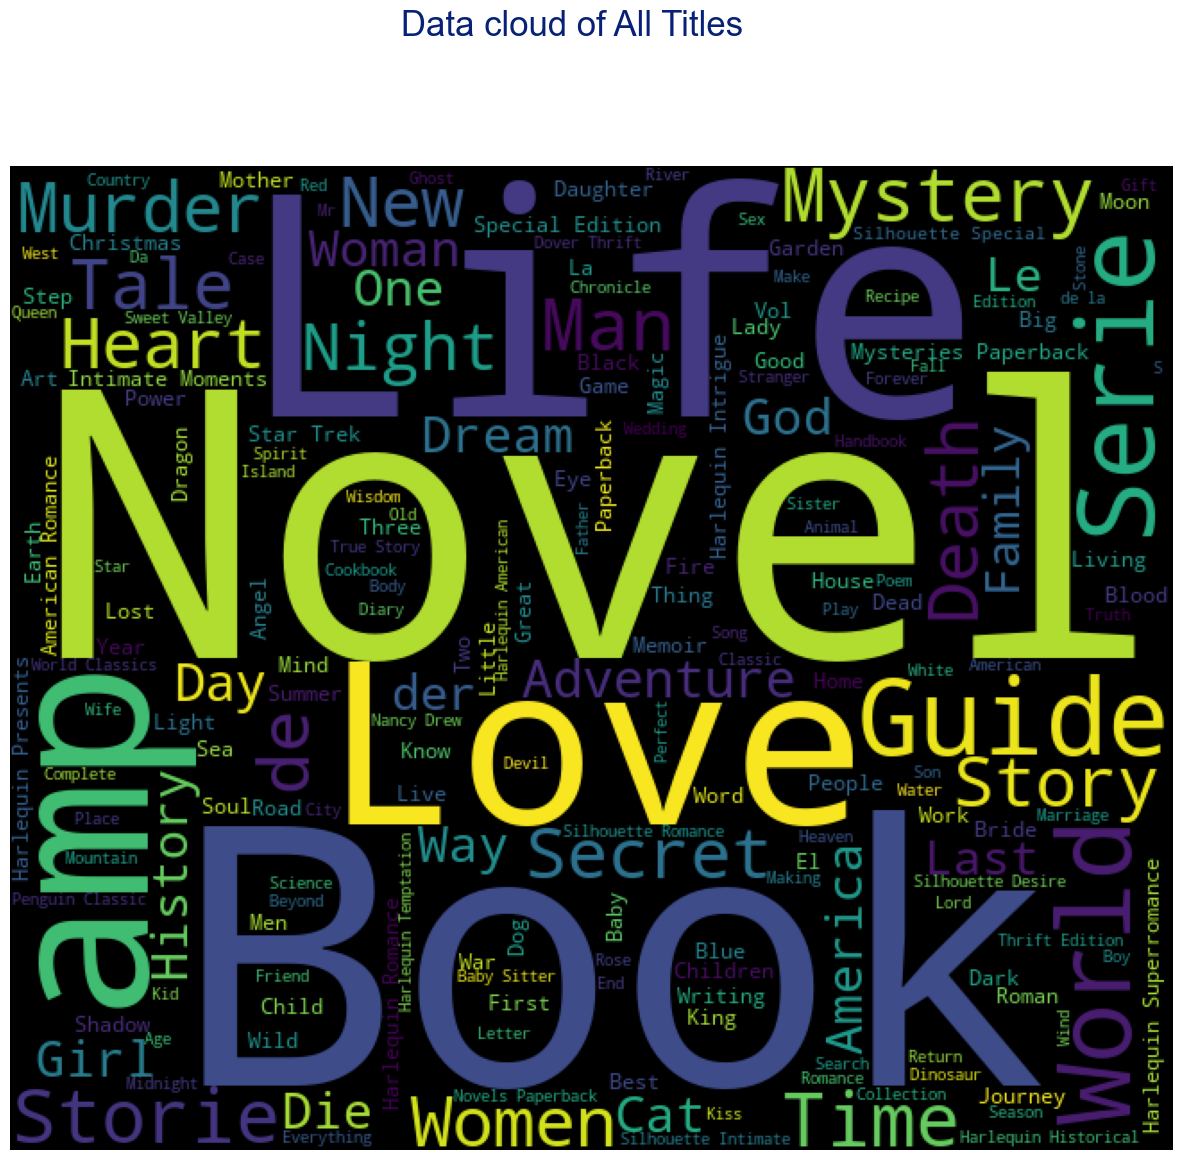

In [70]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='#000',
                          width=650,
                          height=550,
                          stopwords=STOPWORDS,
                         ).generate(" ".join(titles))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.figtext(.5,.91,'Data cloud of All Titles', color='#062175', fontsize=25, ha='center')
plt.show()

# Item-Based Recommendation Engine

In [71]:
# Creating rating_between new feature
df_only_author.loc[ (df_only_author['avg_rating'] >= 0) & (df_only_author['avg_rating'] <= 1), 'rating_between'] = "between_0_to_1"
df_only_author.loc[ (df_only_author['avg_rating'] > 1) & (df_only_author['avg_rating'] <= 2), 'rating_between'] = "between_1_to_2"
df_only_author.loc[ (df_only_author['avg_rating'] > 2) & (df_only_author['avg_rating'] <= 3), 'rating_between'] = "between_2_to_3"
df_only_author.loc[ (df_only_author['avg_rating'] > 3) & (df_only_author['avg_rating'] <= 4), 'rating_between'] = "between_3_to_4"
df_only_author.loc[ (df_only_author['avg_rating'] > 4) & (df_only_author['avg_rating'] <= 5), 'rating_between'] = "between_4_to_5"
df_only_author.loc[ (df_only_author['avg_rating'] > 5) & (df_only_author['avg_rating'] <= 6), 'rating_between'] = "between_5_to_6"
df_only_author.loc[ (df_only_author['avg_rating'] > 6) & (df_only_author['avg_rating'] <= 7), 'rating_between'] = "between_6_to_7"
df_only_author.loc[ (df_only_author['avg_rating'] > 7) & (df_only_author['avg_rating'] <= 8), 'rating_between'] = "between_7_to_8"
df_only_author.loc[ (df_only_author['avg_rating'] > 8) & (df_only_author['avg_rating'] <= 9), 'rating_between'] = "between_8_to_9"
df_only_author.loc[ (df_only_author['avg_rating'] > 9) & (df_only_author['avg_rating'] <= 10), 'rating_between'] = "between_9_to_10"


In [72]:
df_only_author.head()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating,pr_author,rating_between
0,0001047973,Brave New World,Aldous Huxley,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,1,9.0,Aldous Huxley,between_8_to_9
1,000104799X,Monk's-hood,Ellis Peters,HarperCollins Publishers,http://images.amazon.com/images/P/000104799X.0...,http://images.amazon.com/images/P/000104799X.0...,http://images.amazon.com/images/P/000104799X.0...,2,7.5,Ellis Peters,between_7_to_8
2,0001048082,Made in America,Bill Bryson,HarperCollins Publishers,http://images.amazon.com/images/P/0001048082.0...,http://images.amazon.com/images/P/0001048082.0...,http://images.amazon.com/images/P/0001048082.0...,1,8.0,Bill Bryson,between_7_to_8
3,0001056107,Farmer Giles of Ham: And Other Stories,J. R. R. Tolkien,Trafalgar Square,http://images.amazon.com/images/P/0001056107.0...,http://images.amazon.com/images/P/0001056107.0...,http://images.amazon.com/images/P/0001056107.0...,2,8.0,J. R. R. Tolkien,between_7_to_8
4,0001360469,Babe Dressing,Mandy Stanley,HarperCollins Publishers,http://images.amazon.com/images/P/0001360469.0...,http://images.amazon.com/images/P/0001360469.0...,http://images.amazon.com/images/P/0001360469.0...,1,10.0,Mandy Stanley,between_9_to_10


In [73]:

trial = df_only_author[['avg_rating', 'ratings_count']]
data_model = np.asarray([np.asarray(trial['avg_rating']), np.asarray(trial['ratings_count'])]).T
data_model

array([[9. , 1. ],
       [7.5, 2. ],
       [8. , 1. ],
       ...,
       [0. , 1. ],
       [8. , 1. ],
       [0. , 1. ]])

In [74]:
from sklearn.cluster import KMeans

# Elbow Method
score = []
x = data_model
for cluster in range(1,41):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

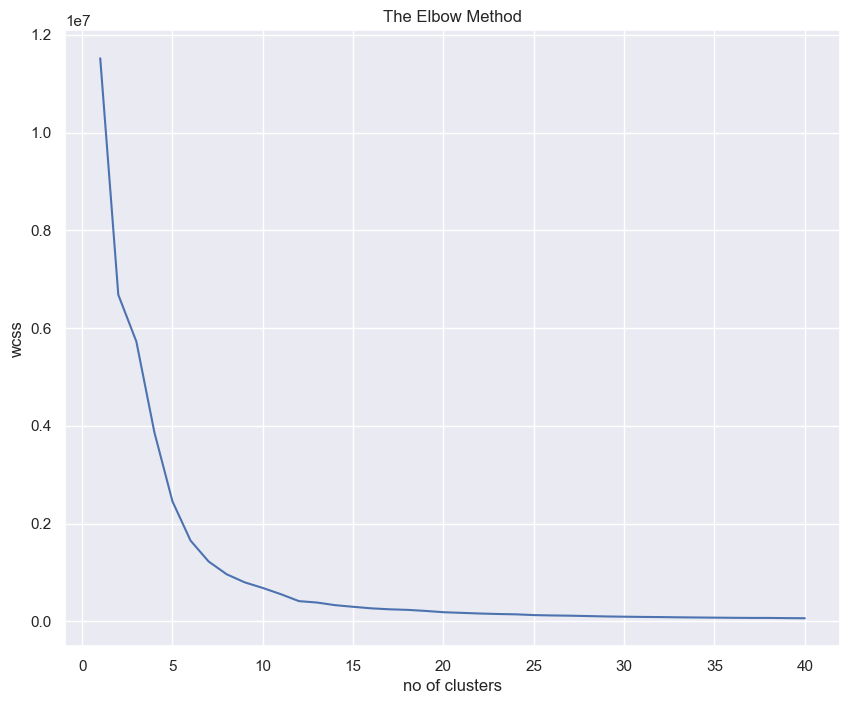

In [75]:
# plotting the score
plt.figure(figsize=(10, 8))
plt.plot(range(1,41), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [76]:
rating_between_df = df_only_author['rating_between'].str.get_dummies(sep=",")
rating_between_df.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5,between_5_to_6,between_6_to_7,between_7_to_8,between_8_to_9,between_9_to_10
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1


In [77]:
engine_features = pd.concat([rating_between_df,df_only_author['avg_rating'],df_only_author['ratings_count']],axis=1)
engine_features.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5,between_5_to_6,between_6_to_7,between_7_to_8,between_8_to_9,between_9_to_10,avg_rating,ratings_count
0,0,0,0,0,0,0,0,0,1,0,9.0,1
1,0,0,0,0,0,0,0,1,0,0,7.5,2
2,0,0,0,0,0,0,0,1,0,0,8.0,1
3,0,0,0,0,0,0,0,1,0,0,8.0,2
4,0,0,0,0,0,0,0,0,0,1,10.0,1


In [78]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
engine_features_scaled = min_max_scaler.fit_transform(engine_features)

In [79]:
from sklearn import neighbors
engine_model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
engine_model.fit(engine_features_scaled)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [80]:
dist, idlist = engine_model.kneighbors(engine_features_scaled)
idlist

array([[884,  25, 347, 212, 758, 901],
       [206, 374,  98,   1, 236, 364],
       [ 33, 240,  57,   8, 214,  12],
       ...,
       [  5,  15,  13,   7,  10,   9],
       [ 33, 240,  57,   8, 214,  12],
       [  5,  15,  13,   7,  10,   9]], dtype=int64)

In [81]:
def book_recommendation_engine(book_name):
    book_list_name = []
    book_id = df_only_author[df_only_author['Book-Title'] == book_name].index
    book_id = book_id[0]

    for sim_b_id in idlist[book_id]:
        book_list_name.append(df_only_author.loc[sim_b_id]['Book-Title'])
    return book_list_name

In [82]:
book_list_name = book_recommendation_engine('The Lovely Bones: A Novel')
book_list_name[1:]

['Alien: Resurrection - The Novelization',
 'Paradise County (American Sisters)',
 'Kleopatra',
 'Guilty: The Collapse of Criminal Justice',
 'A Savage Place']

In [83]:
title_counts = pd.DataFrame(book_ratings_users["Book-Title"].value_counts())

In [84]:
title_counts

,count
Book-Title,
Wild Animus,1344
The Lovely Bones: A Novel,589
The Da Vinci Code,455
The Nanny Diaries: A Novel,373
Bridget Jones's Diary,369
...,...
The Wolves of Savernake,1
Sarah Morgan : The Civil War Diary Of A Southern Woman,1
Walking the Dead Diamond River,1


In [85]:
print(title_counts.index)

Index(['Wild Animus', 'The Lovely Bones: A Novel', 'The Da Vinci Code',
       'The Nanny Diaries: A Novel', 'Bridget Jones's Diary',
       'The Secret Life of Bees', 'Angels &amp; Demons',
       'Divine Secrets of the Ya-Ya Sisterhood: A Novel', 'A Painted House',
       'Life of Pi',
       ...
       'En LA Colonia Penitenciaria', 'El sueÃ±o de los hÃ©roes',
       'Lucia rising', 'Petrol, bait, ammo, &amp; ice',
       'In La-LA Land We Trust', 'The Wolves of Savernake',
       'Sarah Morgan : The Civil War Diary Of A Southern Woman',
       'Walking the Dead Diamond River', 'INLAND ISLAND    P',
       'The Everything Wedding Organizer; Checklists, calendars, and worksheets for planning the perfect wedding'],
      dtype='object', name='Book-Title', length=95999)


In [86]:
print(title_counts.columns)


Index(['count'], dtype='object')


# User-Based Collaborative Filtering Recommendation System

In [87]:
title_counts = pd.DataFrame(book_ratings_users["Book-Title"].value_counts())
rare_books = title_counts[title_counts.iloc[:, 0] <= 100].index
common_books = book_ratings_users[~book_ratings_users["Book-Title"].isin(rare_books)]

In [88]:
common_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
5,0553582747,From the Corner of His Eye,Dean Koontz,2001.0,Bantam Books,http://images.amazon.com/images/P/0553582747.0...,http://images.amazon.com/images/P/0553582747.0...,http://images.amazon.com/images/P/0553582747.0...,42,7.0,"appleton, wisconsin, usa",17.0
6,0425182908,Isle of Dogs,Patricia Cornwell,2002.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,44,0.0,"black mountain, north carolina, usa",51.0
11,0440225701,The Street Lawyer,JOHN GRISHAM,1999.0,Dell,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,51,9.0,"renton, washington, usa",34.0
18,042511774X,Breathing Lessons,Anne Tyler,1994.0,Berkley Publishing Group,http://images.amazon.com/images/P/042511774X.0...,http://images.amazon.com/images/P/042511774X.0...,http://images.amazon.com/images/P/042511774X.0...,67,0.0,"framingham, massachusetts, usa",43.0
19,0804106304,The Joy Luck Club,Amy Tan,1994.0,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,67,0.0,"framingham, massachusetts, usa",43.0


We obtained the new dataset after removing rare books

User-based collaborative filtering makes recommendations based on user-book interactions in the past. The assumption behind the algorithm is that similar users like similar books.

User-based collaborative filtering algorithm usually has the following steps:

1. Find similar users based on interactions with common items.

2. Identify the Books rated high by similar users but have not been exposed to the active user of interest.

3. Calculate the weighted average score for each item.

4. Rank items based on the score and pick the top n items to recommend.

In [89]:
#First we are creating user-book pivot table

user_book_pivot = common_books.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating')
user_book_pivot.head(5)

Book-Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,...,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,Whispers,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# Now we choose a random user to get the similar users
random_user = int(pd.Series(user_book_pivot.index).sample(1).values)
random_user = 144531
random_user_df = user_book_pivot[user_book_pivot.index == random_user]
random_user_df

Book-Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,...,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,Whispers,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
144531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
# Now we choose a random user to get the similar users
random_user = int(pd.Series(user_book_pivot.index).sample(1).values)
random_user = 144531
random_user_df = user_book_pivot[user_book_pivot.index == random_user]
random_user_df

Book-Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,...,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,Whispers,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
144531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0


In [91]:
random_user_books = random_user_df.columns[random_user_df.notna().any()].tolist()
random_user_books

['A Painted House',
 'A Time to Kill',
 'A Walk to Remember',
 'Airframe',
 'Back Roads',
 'Brave New World',
 'Breathing Lessons',
 'Cradle and All',
 'Dance upon the Air (Three Sisters Island Trilogy)',
 'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
 'Fall On Your Knees (Oprah #45)',
 "Full House (Janet Evanovich's Full Series)",
 'Good in Bed',
 'Hannibal',
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'How to Be Good',
 'Isle of Dogs',
 'Life of Pi',
 'Me Talk Pretty One Day',
 'Message in a Bottle',
 'Mystic River',
 'One for the Money (Stephanie Plum Novels (Paperback))',
 'Point of Origin',
 "Pretend You Don't See Her",
 'Rising Sun',
 'Scarlet Feather',
 'Seven Up (A Stephanie Plum Novel)',
 'Southern Cross',
 'Sphere',
 'Summer Sisters',
 'Tell No One',
 'The Catcher in the Rye',
 'The Client',
 'The Divine Secrets of the Ya-Ya Sisterhood: A Novel',
 "The Girls' Guide to Hunting and Fishing",
 'The God of Small Things',
 'The Horse Whisperer',
 'Th

In [92]:
#Now we create a pivot table of all users for the books read by the random user

all_users_df = user_book_pivot[random_user_books]
all_users_df.head()

Book-Title,A Painted House,A Time to Kill,A Walk to Remember,Airframe,Back Roads,Brave New World,Breathing Lessons,Cradle and All,Dance upon the Air (Three Sisters Island Trilogy),Divine Secrets of the Ya-Ya Sisterhood: A Novel,...,The Rainmaker,The Secret Life of Bees,The Summons,The Testament,"The Vampire Lestat (Vampire Chronicles, Book II)",Two for the Dough,Violets Are Blue,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
read_cnts_by_user = all_users_df.T.notna().sum()
read_cnts_by_user = read_cnts_by_user.reset_index()
read_cnts_by_user.columns=['user_id','books_count']
read_cnts_by_user.head()

,user_id,books_count
0,42,0
1,44,1
2,51,0
3,67,1
4,99,0


In [94]:
# we are considering only those users who read 20% of books  that random user has read

perc_20 = 20 * len(random_user_books) / 100
same_b_r_users = read_cnts_by_user[read_cnts_by_user.books_count>perc_20]['user_id']
same_b_r_users.head()

173    3363
332    6251
354    6563
390    7158
405    7346
Name: user_id, dtype: int32

In [95]:
#here we are using corr() - to get the pairwise correlation of all the users
# Then we are doing unstack() to get the multi-level indexing 
#and sorting the correlation values and dropping the duplicates
all_n_rand_df = pd.concat([all_users_df[all_users_df.index.isin(same_b_r_users)],
                          random_user_df[random_user_books]])
correlation_df = all_n_rand_df.T.corr().unstack().sort_values().drop_duplicates()
correlation_df

User-ID  User-ID
78973    114368    -1.000000
126492   28204     -1.000000
23511    96054     -0.997241
64436    43619     -0.997241
141493   112001    -0.995871
                      ...   
167800   156150     1.000000
30487    119575     1.000000
174304   114444     1.000000
3363     155147     1.000000
         8362            NaN
Length: 2823, dtype: float64

In [96]:
correlation_df = pd.DataFrame(correlation_df,columns=['corr'])
correlation_df.index.names = ['user_id_1','user_id_2']
correlation_df = correlation_df.reset_index()
correlation_df.head()

,user_id_1,user_id_2,corr
0,78973,114368,-1.000000
1,126492,28204,-1.000000
2,23511,96054,-0.997241
3,64436,43619,-0.997241
4,141493,112001,-0.995871


In [97]:
#we are setting the threshold correlation as 0.3
threshold_cor = 0.2
top_sim_users = correlation_df[(correlation_df.user_id_1 == random_user) & (correlation_df['corr']>threshold_cor)][['user_id_2','corr']].reset_index(drop=True)
top_sim_users = top_sim_users.sort_values(by='corr',ascending=False)
top_sim_users

,user_id_2,corr
23,59172,0.684653
22,113270,0.611105
21,166123,0.473498
20,163804,0.426314
19,35857,0.426200
18,22625,0.412800
17,9856,0.405862
16,81492,0.394909
15,115003,0.393450
14,30972,0.363995


In [98]:
top_sim_users.rename(columns={'user_id_2':'User-ID'},inplace=True)
top_sim_users.head()

,User-ID,corr
23,59172,0.684653
22,113270,0.611105
21,166123,0.473498
20,163804,0.426314
19,35857,0.426200


In [99]:
top_sim_user_all_b = top_sim_users.merge(book_ratings_users[['ISBN','Book-Title','Image-URL-S','User-ID','Book-Rating']],how='inner')
top_sim_user_all_b['weighted-rating'] = top_sim_user_all_b['corr'] * top_sim_user_all_b['Book-Rating']
top_sim_user_all_b.head()

,User-ID,corr,ISBN,Book-Title,Image-URL-S,Book-Rating,weighted-rating
0,59172,0.684653,0345417623,Timeline,http://images.amazon.com/images/P/0345417623.0...,10.0,6.846532
1,59172,0.684653,0446310786,To Kill a Mockingbird,http://images.amazon.com/images/P/0446310786.0...,10.0,6.846532
2,59172,0.684653,0671888587,I'll Be Seeing You,http://images.amazon.com/images/P/0671888587.0...,0.0,0.000000
3,59172,0.684653,0440225701,The Street Lawyer,http://images.amazon.com/images/P/0440225701.0...,0.0,0.000000
4,59172,0.684653,0671867156,Pretend You Don't See Her,http://images.amazon.com/images/P/0671867156.0...,0.0,0.000000


In [100]:
# now we calculate the avearage of weighted ratings for the books and recommend those which are on the top
recommend_books = top_sim_user_all_b.groupby('Book-Title').agg(weighted_rating = ('weighted-rating','mean')).reset_index().round(2)
recommend_books

,Book-Title,weighted_rating
0,!Yo!,0.00
1,$14 In The Bank (Cathy Collection),2.83
2,"'Til There Was You (Special Edition, No 576)",0.00
3,...And Ladies of the Club,6.85
4,01-01-00: The Novel of the Millennium,0.00
...,...,...
8857,Zoya,0.00
8858,Zoya's Story: An Afghan Woman's Struggle for F...,0.00
8859,\ Lamb to the Slaughter and Other Stories (Pen...,2.85
8860,"\C\"" Is For Corpse""",0.00


In [101]:
threshold_wt_rating = 4
books_recommender = recommend_books[recommend_books.weighted_rating>threshold_wt_rating].sort_values('weighted_rating',ascending=False).head(10)
books_recommender

,Book-Title,weighted_rating
3,...And Ladies of the Club,6.85
6673,The Eighth Commandment,6.85
6263,The Bad Place,6.85
5718,Small Sacrifices: A True Story of Passion and ...,6.85
5276,Rock Dreams,6.85
5245,Ripper,6.85
4970,Precious Angels: A True Story of Two Slain Chi...,6.85
4939,Pop Goes the Weasel (Alex Cross Novels),6.85
4167,Mirage,6.85
4111,Message from Nam,6.85


# User-Based Collaborative Filtering Recommendation Engine

In [102]:
import pandas as pd
def create_user_book_piv(book_ratings_users_copy):   
    book_ratings = book_ratings_users_copy.copy()  
    title_counts = pd.DataFrame(book_ratings["Book-Title"].value_counts())
    rare_books = title_counts[title_counts.iloc[:, 0] <= 100].index
    common_books = book_ratings[~book_ratings["Book-Title"].isin(rare_books)]
    user_book_pivot = common_books.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating")
    return user_book_pivot

book_ratings_users_copy  = book_ratings_users
user_book_df = create_user_book_piv(book_ratings_users_copy)
#print(len(user_book_df))

def user_based_recommender(random_user,df_ratings_copy, user_book_df, ratio=30, cor_th=0.30, score=3.5):
    random_user_df = user_book_df[user_book_df.index == random_user]
    books_read = random_user_df.columns[random_user_df.notna().any()].tolist()
    #print(len(books_read))
    books_read_df = user_book_df[books_read]
    user_book_count = books_read_df.T.notnull().sum()
    user_book_count = user_book_count.reset_index()
    user_book_count.columns = ["user_id", "book_count"]
    perc = len(books_read) * ratio / 100
    #print(perc)
    users_same_books = user_book_count[user_book_count["book_count"] > perc]["user_id"]

    final_df = pd.concat([books_read_df[books_read_df.index.isin(users_same_books)],
                          random_user_df[books_read]])
    #print(len(books_read_df[books_read_df.index.isin(users_same_books)]),len(random_user_df[books_read]))
    #print(len(final_df))
    corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
    #print(corr_df)
    corr_df = pd.DataFrame(corr_df, columns=["corr"])
    corr_df.index.names = ['user_id_1', 'user_id_2']
    corr_df = corr_df.reset_index()
    #print(corr_df)
    top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= cor_th)][
        ["user_id_2", "corr"]].reset_index(drop=True)

    top_users = top_users.sort_values(by='corr', ascending=False)
    top_users.rename(columns={"user_id_2": "User-ID"}, inplace=True)
    #print(top_users)
    rating = df_ratings_copy.copy()
    top_users_ratings = top_users.merge(rating[["User-ID", "ISBN","Book-Title", "Book-Rating"]], how='inner')
    top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['Book-Rating']
    recommendation_df = top_users_ratings.groupby('Book-Title').agg({"weighted_rating": "mean"})
    recommendation_df = recommendation_df.reset_index()

    books_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > score].sort_values("weighted_rating", ascending=False)
    return books_to_be_recommend['Book-Title']

random_user = int(pd.Series(user_book_df.index).sample(1).values)
random_user = 66942
#print(random_user)
books_recom = user_based_recommender(random_user,book_ratings_users_copy, user_book_df, ratio=35, cor_th=0.4, score=9)
print("Recommendation of Books for userid:",random_user," using Used-based Collaborative Filtering")
print(books_recom.reset_index(drop=True))


Recommendation of Books for userid: 66942  using Used-based Collaborative Filtering
0     1,000 Years, 1,000 People: Ranking the Men and...
1                                          The Hot Zone
2     The Third Revolution: Population, Environment,...
3                                 The Screwtape Letters
4     The Pilgrim's Regress: An Allegorical Apology ...
5                                             The Lorax
6     The Legend of Mulan: A Folding Book of the Anc...
7     The Lands of Charm and Cruelty: Travels in Sou...
8                                     The Joy Luck Club
9           The Grapes of Wrath (20th Century Classics)
10       Borneo Log: The Struggle for Sarawak's Forests
11                               The Far Side Gallery 5
12                   The Chronicles of Narnia Boxed Set
13                                           On Writing
14              Old Man And The Sea (Scribner Classics)
15                                           Neverwhere
16                  

In [103]:

all_books_df = item_book_ratings.copy()

def weighted_rating_all(df):
    v = df['ratings_count']
    R = df['avg_rating']
    C = df['avg_rating'].mean()
    m = df['ratings_count'].quantile(0.9)
    return (v/(v+m) * R) + (m/(m+v) * C)

all_books_df['weighted_score'] = weighted_rating_all(all_books_df)

all_books_df.head(2)

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating,weighted_score
0,0001047973,Brave New World,Aldous Huxley,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,1,9.0,3.769664
1,000104799X,Monk's-hood,Ellis Peters,HarperCollins Publishers,http://images.amazon.com/images/P/000104799X.0...,http://images.amazon.com/images/P/000104799X.0...,http://images.amazon.com/images/P/000104799X.0...,2,7.5,4.017479


# Clustering of Books of young readers with DBSCAN 

In [104]:
young_readers.head()
book_ratings_w_y = young_readers.groupby(['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']).agg(ratings_count = ('User-ID','count'),avg_rating=('Book-Rating','mean')).round(2)
book_ratings_w_y = book_ratings_w_y.reset_index(level=['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'])
book_ratings_w_y.head()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating
0,0001047973,Brave New World,Aldous Huxley,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,1,9.0
1,0002251760,The Forgetting Room: A Fiction (Byzantium Book),Nick Bantock,Harpercollins,http://images.amazon.com/images/P/0002251760.0...,http://images.amazon.com/images/P/0002251760.0...,http://images.amazon.com/images/P/0002251760.0...,2,7.5
2,0002259834,Miss Wyoming Uk Edition,Douglas Coupland,Harpercollins Publisher,http://images.amazon.com/images/P/0002259834.0...,http://images.amazon.com/images/P/0002259834.0...,http://images.amazon.com/images/P/0002259834.0...,1,9.0
3,0002310694,Black as he's painted,Ngaio Marsh,Collins [for] the Crime Club,http://images.amazon.com/images/P/0002310694.0...,http://images.amazon.com/images/P/0002310694.0...,http://images.amazon.com/images/P/0002310694.0...,1,7.0
4,0002311216,"Passenger to Frankfurt: An extravaganza,",Agatha Christie,[Published for] the Crime Club [by] Collins,http://images.amazon.com/images/P/0002311216.0...,http://images.amazon.com/images/P/0002311216.0...,http://images.amazon.com/images/P/0002311216.0...,1,8.0


In [105]:
# Creating rating_between new feature
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] >= 0) & (book_ratings_w_y['avg_rating'] <= 1), 'rating_between'] = "between_0_to_1"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 1) & (book_ratings_w_y['avg_rating'] <= 2), 'rating_between'] = "between_1_to_2"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 2) & (book_ratings_w_y['avg_rating'] <= 3), 'rating_between'] = "between_2_to_3"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 3) & (book_ratings_w_y['avg_rating'] <= 4), 'rating_between'] = "between_3_to_4"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 4) & (book_ratings_w_y['avg_rating'] <= 5), 'rating_between'] = "between_4_to_5"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 5) & (book_ratings_w_y['avg_rating'] <= 6), 'rating_between'] = "between_5_to_6"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 6) & (book_ratings_w_y['avg_rating'] <= 7), 'rating_between'] = "between_6_to_7"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 7) & (book_ratings_w_y['avg_rating'] <= 8), 'rating_between'] = "between_7_to_8"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 8) & (book_ratings_w_y['avg_rating'] <= 9), 'rating_between'] = "between_8_to_9"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 9) & (book_ratings_w_y['avg_rating'] <= 10), 'rating_between'] = "between_9_to_10"


In [ ]:
young_readers.head()
book_ratings_w_y = young_readers.groupby(['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']).agg(ratings_count = ('User-ID','count'),avg_rating=('Book-Rating','mean')).round(2)
book_ratings_w_y = book_ratings_w_y.reset_index(level=['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'])
book_ratings_w_y.head()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating
0,0001047973,Brave New World,Aldous Huxley,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,1,9.0
1,0002251760,The Forgetting Room: A Fiction (Byzantium Book),Nick Bantock,Harpercollins,http://images.amazon.com/images/P/0002251760.0...,http://images.amazon.com/images/P/0002251760.0...,http://images.amazon.com/images/P/0002251760.0...,2,7.5
2,0002259834,Miss Wyoming Uk Edition,Douglas Coupland,Harpercollins Publisher,http://images.amazon.com/images/P/0002259834.0...,http://images.amazon.com/images/P/0002259834.0...,http://images.amazon.com/images/P/0002259834.0...,1,9.0
3,0002310694,Black as he's painted,Ngaio Marsh,Collins [for] the Crime Club,http://images.amazon.com/images/P/0002310694.0...,http://images.amazon.com/images/P/0002310694.0...,http://images.amazon.com/images/P/0002310694.0...,1,7.0
4,0002311216,"Passenger to Frankfurt: An extravaganza,",Agatha Christie,[Published for] the Crime Club [by] Collins,http://images.amazon.com/images/P/0002311216.0...,http://images.amazon.com/images/P/0002311216.0...,http://images.amazon.com/images/P/0002311216.0...,1,8.0


In [106]:

rating_between_df_y = book_ratings_w_y['rating_between'].str.get_dummies(sep=",")
len(rating_between_df_y)

14583

[-1  0  1  2  3  4  5  6  7]


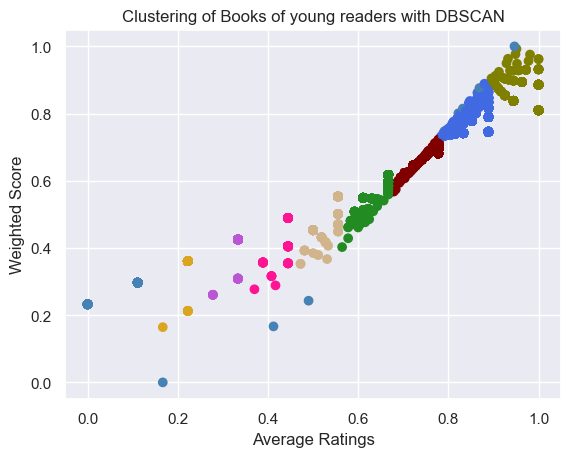

The silhouettescore with DBSCAN for the young-readers books dataset: 0.97
The calinski harabasz score with DBSCAN for the young-readers books dataset: 212585.92
The davies bouldin score with DBSCAN for the young-readers books dataset: 0.59


In [107]:
all_books_df_y = book_ratings_w_y.copy()

def weighted_rating_all(df):
    v = df['ratings_count']
    R = df['avg_rating']
    C = df['avg_rating'].mean()
    m = df['ratings_count'].quantile(0.9)
    return (v/(v+m) * R) + (m/(m+v) * C)

all_books_df_y['weighted_score'] = weighted_rating_all(all_books_df_y)

all_books_df_y

model_df = pd.concat([rating_between_df_y, all_books_df_y['weighted_score'], all_books_df_y['avg_rating'], all_books_df_y['ratings_count']], axis=1)
model_df.head()

min_max_scaler = MinMaxScaler()
model_df_final = min_max_scaler.fit_transform(model_df)

model_dbscan_df = model_df_final.copy()

from sklearn.cluster import DBSCAN
DBSCAN_model = DBSCAN(eps=0.2, min_samples=120, algorithm='kd_tree')
DBSCAN_model.fit(model_dbscan_df)

#looks like unsupervised ML decides there are  genres
clusters_db_y = DBSCAN_model.labels_
print(np.unique(clusters_db_y))

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink',
          'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'orange', 'violet',
           'green', 'yellow', 'cyan', 'magenta', 'black', 'white', 'blue', 'steelblue']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(model_dbscan_df[:,-2], model_dbscan_df[:,-3], c=vectorizer(clusters_db_y))
plt.title("Clustering of Books of young readers with DBSCAN")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()
sc_y_db = silhouette_score(model_dbscan_df,clusters_db_y)
cal_score_y_db = calinski_harabasz_score(model_dbscan_df, clusters_db_y)
davies_y_db = davies_bouldin_score(model_dbscan_df, clusters_db_y)
print("The silhouettescore with DBSCAN for the young-readers books dataset:",np.round(sc_y_db,2))
print("The calinski harabasz score with DBSCAN for the young-readers books dataset:",np.round(cal_score_y_db,2))
print("The davies bouldin score with DBSCAN for the young-readers books dataset:",np.round(davies_y_db,2))


In [108]:
def book_recommendation_engine_dbscan_y(book_name):
    book_id = all_books_df_y[all_books_df_y['Book-Title'] == book_name ].index
    cluster_id = clusters_db_y[book_id][0]
    df_cl =pd.DataFrame(clusters_db_y,columns=['cl_id'])
    book_ids = df_cl[df_cl['cl_id']==cluster_id].index 
    books_picked = all_books_df_y.loc[book_ids]
    top_20_books_picked_dbscan = books_picked.sort_values(by ='weighted_score',ascending=False).head(20)
    recommended_books_dbscan = top_20_books_picked_dbscan[['Book-Title']]
    return recommended_books_dbscan.reset_index(drop=True)

In [109]:
books_rec_dbscan = book_recommendation_engine_dbscan_y('Prague : A Novel')
print(books_rec_dbscan)

                                           Book-Title
0                               Black as he's painted
1                 No Drinking, No Dancing, No Doctors
2                                           Hard Love
3                                   Star in the Storm
4                            Between Worlds (Charmed)
5   Dragondrums (Mccaffrey, Anne. Harper Hall Tril...
6     Dora's Storytime Collection (Dora The Explorer)
7                   How Not to Spend Your Senior Year
8                            E: The Story of a Number
9                                  Babushka Baba Yaga
10                                    Divorce Express
11                                          Backwater
12  Culture Wars and Local Politics (Studies in Go...
13                        DINOSAUR PLANET 2 SURVIVORS
14                                       Autohypnosis
15  Appley Dapply's Nursery Rhymes (Original Peter...
16            The Little Yellow Book (Flower Fairies)
17                          

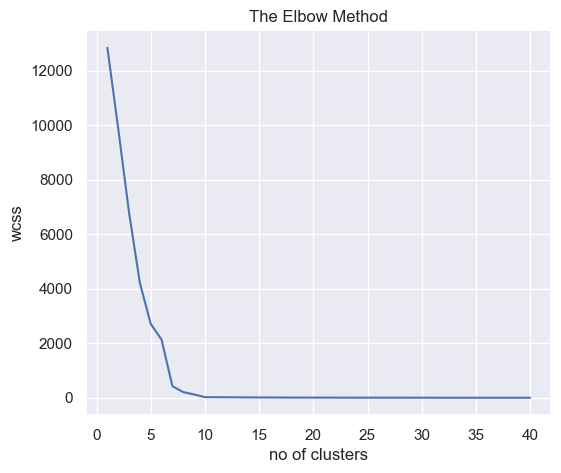

In [110]:
from sklearn.cluster import KMeans

# Elbow Method
score = []
x = model_dbscan_df
for cluster in range(1,41):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

# plotting the score
plt.figure(figsize=(6, 5))
plt.plot(range(1,41), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

# KMeans clustering of Books for young-readers

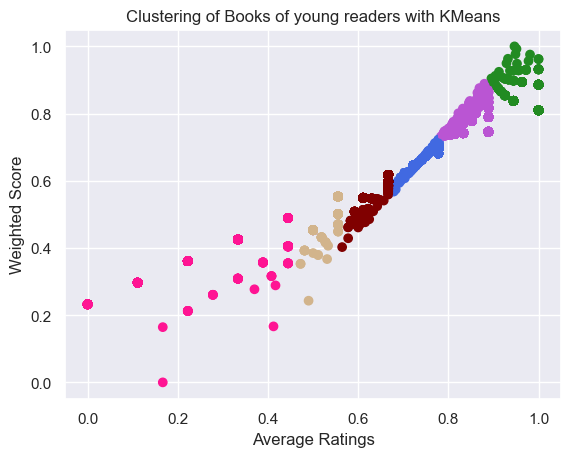

The silhouettescore with KMeans for the young-readers books dataset: 0.92
The calinski harabasz score with KMeans for the young-readers books dataset: 34388.86
The davies bouldin score with KMeans for the young-readers books dataset: 0.48


In [111]:

kmeans_y = KMeans(n_clusters=6,init='k-means++', max_iter=500)
kmeans_y.fit(model_dbscan_df)
kmeans_clusters_y = kmeans_y.labels_

plt.scatter(model_dbscan_df[:,-2], model_dbscan_df[:,-3], c=vectorizer(kmeans_clusters_y))
plt.title("Clustering of Books of young readers with KMeans")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_y_km = silhouette_score(model_dbscan_df,kmeans_clusters_y)
cal_score_y_km = calinski_harabasz_score(model_dbscan_df, kmeans_clusters_y)
davies_y_km = davies_bouldin_score(model_dbscan_df, kmeans_clusters_y)
print("The silhouettescore with KMeans for the young-readers books dataset:",np.round(sc_y_km,2))
print("The calinski harabasz score with KMeans for the young-readers books dataset:",np.round(cal_score_y_km,2))
print("The davies bouldin score with KMeans for the young-readers books dataset:",np.round(davies_y_km,2))



In [112]:
# Alternatively, perform a case-insensitive check and strip whitespace
def book_recommendation_engine_kmeans_y(book_name):
    # Normalize book titles for matching
    all_books_df_y['Book-Title'] = all_books_df_y['Book-Title'].str.strip().str.lower()
    book_name = book_name.strip().lower()
    
    # Find the book_id
    book_id = all_books_df_y[all_books_df_y['Book-Title'] == book_name].index
    
    # Check if book_id is empty
    if book_id.empty:
        print(f"Book title '{book_name}' not found in the dataset.")
        return pd.DataFrame()  # Return an empty DataFrame or handle it appropriately
    
    # Find the cluster_id
    cluster_id = kmeans_clusters_y[book_id[0]]
    df_cl = pd.DataFrame(kmeans_clusters_y, columns=['cl_id'])
    
    # Find all books in the same cluster
    book_ids = df_cl[df_cl['cl_id'] == cluster_id].index
    top_20_books_picked_kmeans = all_books_df_y.loc[book_ids].head(20)
    
    recommended_books_kmeans = top_20_books_picked_kmeans[['Book-Title']]
    return recommended_books_kmeans.reset_index(drop=True)

# Call the function with 'Red Shift'
books_rec_kmeans = book_recommendation_engine_kmeans_y('Brave new world')
print(books_rec_kmeans)


                                           Book-Title
0                                     brave new world
1                             miss wyoming uk edition
2                                       angelas ashes
3                                          red leaves
4                                seven years in tibet
5                                               billy
6                              great gatsby (reissue)
7                    lion, the witch and the wardrobe
8                          voyage of the dawn treader
9   politically correct bedtime stories: modern ta...
10        discovering ideas: an anthology for writers
11  the trobrianders of papua new guinea (case stu...
12                       summerhouse, later : stories
13                sleeping beauty (margolin, phillip)
14                                the dominant blonde
15  don't know much about history : everything you...
16  she went all the way (avon light contemporary ...
17                          

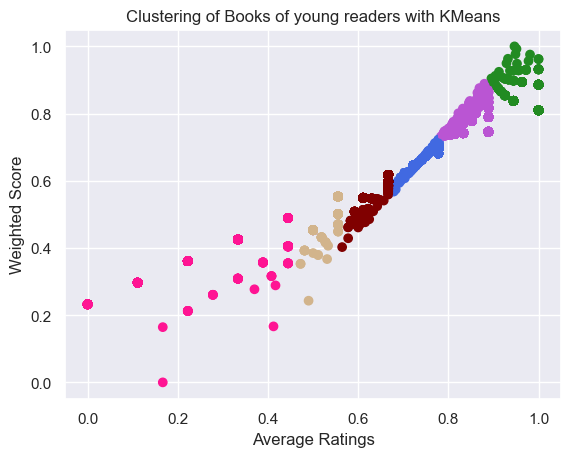

The silhouettescore with KMeans for the young-readers books dataset: 0.92
The calinski harabasz score with KMeans for the young-readers books dataset: 34388.86
The davies bouldin score with KMeans for the young-readers books dataset: 0.48


In [ ]:

kmeans_y = KMeans(n_clusters=6,init='k-means++', max_iter=500)
kmeans_y.fit(model_dbscan_df)
kmeans_clusters_y = kmeans_y.labels_

plt.scatter(model_dbscan_df[:,-2], model_dbscan_df[:,-3], c=vectorizer(kmeans_clusters_y))
plt.title("Clustering of Books of young readers with KMeans")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_y_km = silhouette_score(model_dbscan_df,kmeans_clusters_y)
cal_score_y_km = calinski_harabasz_score(model_dbscan_df, kmeans_clusters_y)
davies_y_km = davies_bouldin_score(model_dbscan_df, kmeans_clusters_y)
print("The silhouettescore with KMeans for the young-readers books dataset:",np.round(sc_y_km,2))
print("The calinski harabasz score with KMeans for the young-readers books dataset:",np.round(cal_score_y_km,2))
print("The davies bouldin score with KMeans for the young-readers books dataset:",np.round(davies_y_km,2))



# Agglomerative Clustering of books of young readers 

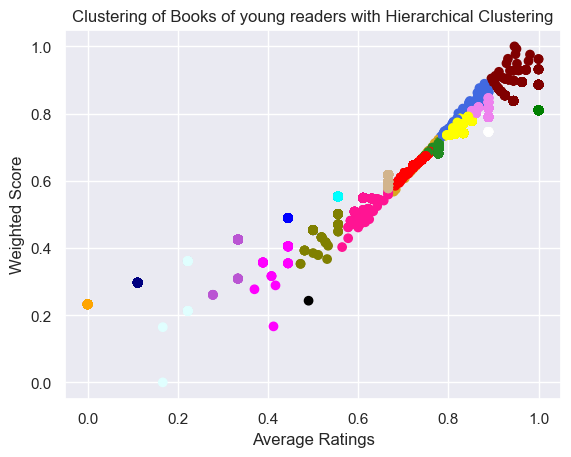

The silhouettescore with Agglomerative Clustering for the young-readers books dataset: 0.88
The calinski harabasz score with Agglomerative Clustering for the young-readers books dataset: 1469135.69
The davies bouldin score with Agglomerative Clustering for the young-readers books dataset: 0.4


In [113]:
from sklearn.cluster import AgglomerativeClustering
agglo_y = AgglomerativeClustering(n_clusters=20)
agglo_y.fit(model_dbscan_df)
agglo_clusters_y = agglo_y.labels_

plt.scatter(model_dbscan_df[:,-2], model_dbscan_df[:,-3], c=vectorizer(agglo_clusters_y))
plt.title("Clustering of Books of young readers with Hierarchical Clustering")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_y_agl = silhouette_score(model_dbscan_df,agglo_clusters_y)
cal_score_y_agl = calinski_harabasz_score(model_dbscan_df, agglo_clusters_y)
davies_y_agl = davies_bouldin_score(model_dbscan_df, agglo_clusters_y)
print("The silhouettescore with Agglomerative Clustering for the young-readers books dataset:",np.round(sc_y_agl,2))
print("The calinski harabasz score with Agglomerative Clustering for the young-readers books dataset:",np.round(cal_score_y_agl,2))
print("The davies bouldin score with Agglomerative Clustering for the young-readers books dataset:",np.round(davies_y_agl,2))


In [114]:
def book_recommendation_engine_agglo_y(book_name):
    # Normalize book titles for matching
    all_books_df_y['Book-Title'] = all_books_df_y['Book-Title'].str.strip().str.lower()
    book_name_normalized = book_name.strip().lower()
    
    # Find the book_id
    book_id = all_books_df_y[all_books_df_y['Book-Title'] == book_name_normalized].index
    
    # Check if book_id is empty
    if book_id.empty:
        print(f"Book title '{book_name}' not found in the dataset.")
        return pd.DataFrame()  # Return an empty DataFrame or handle it appropriately
    
    # Find the cluster_id
    cluster_id = agglo_clusters_y[book_id[0]]
    df_cl = pd.DataFrame(agglo_clusters_y, columns=['cl_id'])
    
    # Find all books in the same cluster
    book_ids = df_cl[df_cl['cl_id'] == cluster_id].index
    books_picked = all_books_df_y.loc[book_ids]
    
    # Sort and select top 20 books
    top_20_books_picked_agglo = books_picked.sort_values(by='weighted_score', ascending=False).head(20)
    recommended_books_agglo = top_20_books_picked_agglo[['Book-Title']]
    return recommended_books_agglo.reset_index(drop=True)

# Test the function with 'The Constant Gardener'
books_rec_agglo = book_recommendation_engine_agglo_y('The Constant Gardener')
print(books_rec_agglo)


                                           Book-Title
0   insights from the outfield (peanuts at work &a...
1                                              heaven
2                               moonlight becomes you
3                                       short stories
4   tonight on the titanic (magic tree house 17, p...
5                           the boy who lost his face
6   polar bears past bedtime (magic tree house 12,...
7     night of the full moon (stepping stone,  paper)
8   junie b. jones loves handsome warren (junie b....
9   junie b. jones and her big fat mouth (junie b....
10                              dogs don't tell jokes
11  mummies in the morning (magic tree house, book 3)
12                     in the skin of a lion: a novel
13               krik? krak! (vintage contemporaries)
14                                       vox: a novel
15                                    talking it over
16  sexual personae: art and decadence from nefert...
17            picturing will

In [115]:
matured_readers.head()
book_ratings_w_m = matured_readers.groupby(['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']).agg(ratings_count = ('User-ID','count'),avg_rating=('Book-Rating','mean')).round(2)
book_ratings_w_m = book_ratings_w_m.reset_index(level=['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'])
book_ratings_w_m.head(2)

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating
0,0001056107,Farmer Giles of Ham: And Other Stories,J. R. R. Tolkien,Trafalgar Square,http://images.amazon.com/images/P/0001056107.0...,http://images.amazon.com/images/P/0001056107.0...,http://images.amazon.com/images/P/0001056107.0...,1,8.0
1,0001939203,The Collins Book of Nursery Tales,Jonathan Langley,HarperCollins Publishers,http://images.amazon.com/images/P/0001939203.0...,http://images.amazon.com/images/P/0001939203.0...,http://images.amazon.com/images/P/0001939203.0...,1,8.0


In [116]:
# Creating rating_between new feature
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] >= 0) & (book_ratings_w_m['avg_rating'] <= 1), 'rating_between'] = "between_0_to_1"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 1) & (book_ratings_w_m['avg_rating'] <= 2), 'rating_between'] = "between_1_to_2"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 2) & (book_ratings_w_m['avg_rating'] <= 3), 'rating_between'] = "between_2_to_3"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 3) & (book_ratings_w_m['avg_rating'] <= 4), 'rating_between'] = "between_3_to_4"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 4) & (book_ratings_w_m['avg_rating'] <= 5), 'rating_between'] = "between_4_to_5"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 5) & (book_ratings_w_m['avg_rating'] <= 6), 'rating_between'] = "between_5_to_6"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 6) & (book_ratings_w_m['avg_rating'] <= 7), 'rating_between'] = "between_6_to_7"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 7) & (book_ratings_w_m['avg_rating'] <= 8), 'rating_between'] = "between_7_to_8"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 8) & (book_ratings_w_m['avg_rating'] <= 9), 'rating_between'] = "between_8_to_9"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 9) & (book_ratings_w_m['avg_rating'] <= 10), 'rating_between'] = "between_9_to_10"


In [117]:

rating_between_df_m = book_ratings_w_m['rating_between'].str.get_dummies(sep=",")
len(rating_between_df_m)

34910

# DBSCAN Clustering of Books of matured readers

[-1  0  1  2  3  4  5  6  7  8]


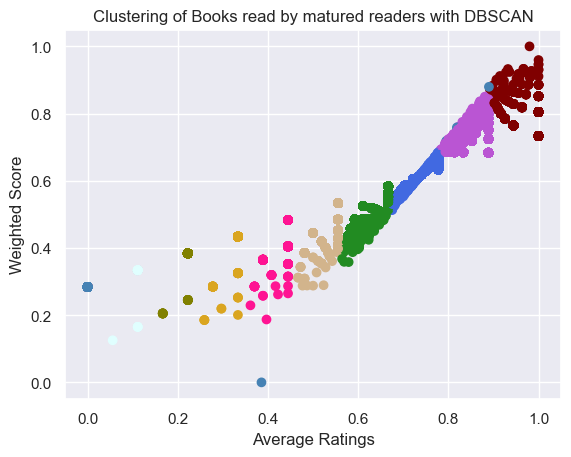

The silhouettescore with DBSCAN for the matured-readers books dataset: 0.97
The calinski harabasz score with DBSCAN for the matured-readers books dataset: 1444292.2
The davies bouldin score with DBSCAN for the matured-readers books dataset: 0.14


In [118]:
all_books_df_m = book_ratings_w_m.copy()

def weighted_rating_all(df):
    v = df['ratings_count']
    R = df['avg_rating']
    C = df['avg_rating'].mean()
    m = df['ratings_count'].quantile(0.9)
    return (v/(v+m) * R) + (m/(m+v) * C)

all_books_df_m['weighted_score'] = weighted_rating_all(all_books_df_m)

all_books_df_m

model_df = pd.concat([rating_between_df_m, all_books_df_m['weighted_score'], all_books_df_m['avg_rating'], all_books_df_m['ratings_count']], axis=1)
model_df.head()

min_max_scaler = MinMaxScaler()
model_df_final = min_max_scaler.fit_transform(model_df)

model_dbscan_df = model_df_final.copy()

from sklearn.cluster import DBSCAN
DBSCAN_model = DBSCAN(eps=0.2, min_samples=120, algorithm='kd_tree')
DBSCAN_model.fit(model_dbscan_df)

#looks like unsupervised ML decides there are  genres
clusters_db_m = DBSCAN_model.labels_
print(np.unique(clusters_db_m))

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink',
          'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'orange', 'violet',
           'green', 'yellow', 'cyan', 'magenta', 'black', 'white', 'blue', 'steelblue']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(model_dbscan_df[:,-2], model_dbscan_df[:,-3], c=vectorizer(clusters_db_m))
plt.title("Clustering of Books read by matured readers with DBSCAN")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_m_db = silhouette_score(model_dbscan_df,clusters_db_m)
cal_score_m_db = calinski_harabasz_score(model_dbscan_df, clusters_db_m)
davies_m_db = davies_bouldin_score(model_dbscan_df, clusters_db_m)
print("The silhouettescore with DBSCAN for the matured-readers books dataset:",np.round(sc_m_db,2))
print("The calinski harabasz score with DBSCAN for the matured-readers books dataset:",np.round(cal_score_m_db,2))
print("The davies bouldin score with DBSCAN for the matured-readers books dataset:",np.round(davies_m_db,2))




In [119]:
def book_recommendation_engine_dbscan_m(book_name):
    book_id = all_books_df_m[all_books_df_m['Book-Title'] == book_name ].index
    cluster_id = clusters_db_m[book_id][0]
    df_cl =pd.DataFrame(clusters_db_m,columns=['cl_id'])
    book_ids = df_cl[df_cl['cl_id']==cluster_id].index 
    books_picked = all_books_df_m.loc[book_ids]
    top_20_books_picked_dbscan = books_picked.sort_values(by ='weighted_score',ascending=False).head(20)
    recommended_books_dbscan = top_20_books_picked_dbscan[['Book-Title']]
    return recommended_books_dbscan.reset_index(drop=True)

books_rec_dbscan = book_recommendation_engine_dbscan_m('Prague : A Novel')
print(books_rec_dbscan)

                                           Book-Title
0   Alice's Adventures in Wonderland and Through t...
1   The Nutrition Bible: The Comprehensive, No-Non...
2                    Eating the Cheshire Cat: A Novel
3                        This is My Daughter: A Novel
4   CHOCOLATE FOR A LOVER'S HEART : SOUL-SOOTHING ...
5                            Who I Was Supposed To Be
6   Grave Secrets (Temperance Brennan Novel (Hardc...
7                            ZACHARY'S WINGS: A Novel
8   The Motley Fools Rule Breakers Rule Makers : T...
9               Sweet St. Louis : AN Urban Love Story
10  HEN FRIGATES: Passion and Peril, Nineteenth-Ce...
11      LIFE MAGIC : THE POWER OF POSITIVE WITCHCRAFT
12                          A SONG OF STONE : A NOVEL
13  A Mind of Its Own: A Cultural History of the P...
14  Shadow : Five Presidents and the Legacy of Wat...
15  Spanking Watson : A Novel (Kinky Friedman Nove...
16                     The FALL OF A SPARROW: A NOVEL
17                      WAIT

# KMeans Clustering of books of matured readers

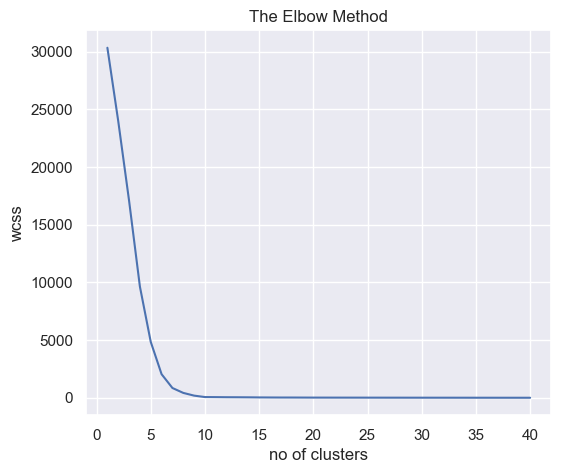

In [120]:
from sklearn.cluster import KMeans

# Elbow Method
score = []
x = model_df_final
for cluster in range(1,41):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

# plotting the score
plt.figure(figsize=(6, 5))
plt.plot(range(1,41), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

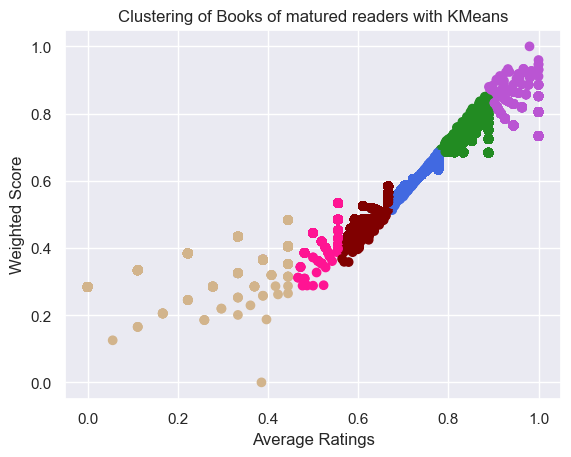

The silhouettescore with KMeans for the matured-readers books dataset: 0.92
The calinski harabasz score with KMeans for the matured-readers books dataset: 96434.78
The davies bouldin score with KMeans for the matured-readers books dataset: 0.44


In [121]:

kmeans_m = KMeans(n_clusters=6,init='k-means++', max_iter=500)
kmeans_m.fit(model_df_final)
kmeans_clusters_m = kmeans_m.labels_

plt.scatter(model_df_final[:,-2], model_df_final[:,-3], c=vectorizer(kmeans_clusters_m))
plt.title("Clustering of Books of matured readers with KMeans")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_m_km = silhouette_score(model_df_final,kmeans_clusters_m)
cal_score_m_km = calinski_harabasz_score(model_df_final, kmeans_clusters_m)
davies_m_km = davies_bouldin_score(model_df_final, kmeans_clusters_m)
print("The silhouettescore with KMeans for the matured-readers books dataset:",np.round(sc_m_km,2))
print("The calinski harabasz score with KMeans for the matured-readers books dataset:",np.round(cal_score_m_km,2))
print("The davies bouldin score with KMeans for the matured-readers books dataset:",np.round(davies_m_km,2))



In [122]:
print(all_books_df_m['Book-Title'].unique())

['Farmer Giles of Ham: And Other Stories'
 'The Collins Book of Nursery Tales' 'Collins guide to dinosaurs' ...
 "McNally's Chance"
 "Discover Your Genius: How to Think Like History's Ten Most Revolutionary Minds"
 'THE FIRST TARZAN OMNIBUS: Tarzan of the Apes; The Return of Tarzan; Jungle Tales of Tarzan']


In [123]:
def book_recommendation_engine_kmeans_m(book_name):
    # Normalize book titles for matching
    all_books_df_m['Book-Title'] = all_books_df_m['Book-Title'].str.strip().str.lower()
    book_name_normalized = book_name.strip().lower()
    

    
    # Find the book_id
    book_id = all_books_df_m[all_books_df_m['Book-Title'] == book_name_normalized].index
    
    # Debug: Print the book_id
    print(f"Book ID: {book_id}")
    
    # Check if book_id is empty
    if book_id.empty:
        print(f"Book title '{book_name}' not found in the dataset.")
        return pd.DataFrame()  # Return an empty DataFrame or handle it appropriately
    
    # Find the cluster_id
    cluster_id = kmeans_clusters_m[book_id[0]]
    df_cl = pd.DataFrame(kmeans_clusters_m, columns=['cl_id'])
    
    # Find all books in the same cluster
    book_ids = df_cl[df_cl['cl_id'] == cluster_id].index
    books_picked = all_books_df_m.loc[book_ids]
    
    # Sort and select top 20 books
    top_20_books_picked_kmeans = books_picked.sort_values(by='weighted_score', ascending=False).head(20)
    recommended_books_kmeans = top_20_books_picked_kmeans[['Book-Title']]
    return recommended_books_kmeans.reset_index(drop=True)

# Test the function with 'farmer giles of ham'
books_rec_kmeans = book_recommendation_engine_kmeans_m('farmer giles of ham: and other stories')
print(books_rec_kmeans)


Book ID: Index([0], dtype='int64')
                                           Book-Title
0                                        the notebook
1   wicked: the life and times of the wicked witch...
2                                 angels &amp; demons
3                                 1st to die: a novel
4                                      angela's ashes
5                                     point of origin
6                                 the virgin suicides
7                                   the boy next door
8                                        the hot zone
9                          about a boy (movie tie-in)
10  the four agreements: a practical guide to pers...
11           what looks like crazy on an ordinary day
12                                          tara road
13                                skinny legs and all
14                        the world according to garp
15                                         2nd chance
16                                    the thorn

# Agglomerative clustering books of Matured Readers

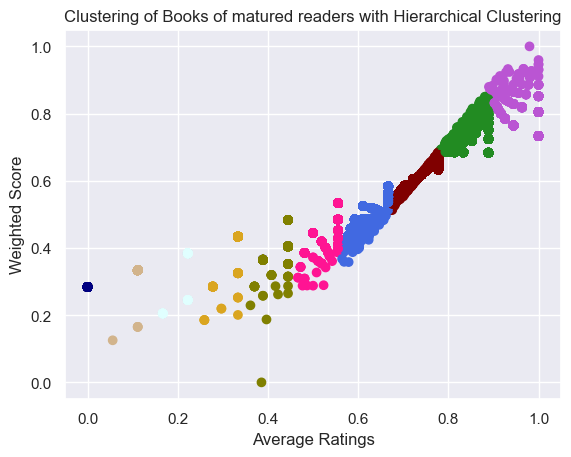

The silhouettescore with Agglomerative Clustering for the matured-readers books dataset: 0.97
The calinski harabasz score with Agglomerative Clustering for the matured-readers books dataset: 1787206.78
The davies bouldin score with Agglomerative Clustering for the matured-readers books dataset: 0.04


In [124]:
agglo_m = AgglomerativeClustering(n_clusters=10)
agglo_m.fit(model_df_final)
agglo_clusters_m = agglo_m.labels_

plt.scatter(model_df_final[:,-2], model_df_final[:,-3], c=vectorizer(agglo_clusters_m))
plt.title("Clustering of Books of matured readers with Hierarchical Clustering")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_m_agl = silhouette_score(model_df_final,agglo_clusters_m)
cal_score_m_agl = calinski_harabasz_score(model_df_final, agglo_clusters_m)
davies_m_agl = davies_bouldin_score(model_df_final, agglo_clusters_m)
print("The silhouettescore with Agglomerative Clustering for the matured-readers books dataset:",np.round(sc_m_agl,2))
print("The calinski harabasz score with Agglomerative Clustering for the matured-readers books dataset:",np.round(cal_score_m_agl,2))
print("The davies bouldin score with Agglomerative Clustering for the matured-readers books dataset:",np.round(davies_m_agl,2))


In [125]:
def book_recommendation_engine_agglo_m(book_name):
    # Normalize book titles for matching
    all_books_df_m['Book-Title'] = all_books_df_m['Book-Title'].str.strip().str.lower()
    book_name_normalized = book_name.strip().lower()
    
    
    # Find the book_id
    book_id = all_books_df_m[all_books_df_m['Book-Title'] == book_name_normalized].index
    
    # Debug: Print the book_id
    print(f"Book ID: {book_id}")
    
    # Check if book_id is empty
    if book_id.empty:
        print(f"Book title '{book_name}' not found in the dataset.")
        return pd.DataFrame()  # Return an empty DataFrame or handle it appropriately
    
    # Find the cluster_id
    cluster_id = agglo_clusters_m[book_id[0]]
    df_cl = pd.DataFrame(agglo_clusters_m, columns=['cl_id'])
    
    # Find all books in the same cluster
    book_ids = df_cl[df_cl['cl_id'] == cluster_id].index
    books_picked = all_books_df_m.loc[book_ids]
    
    # Sort and select top 20 books
    top_20_books_picked_agglo = books_picked.sort_values(by='weighted_score', ascending=False).head(20)
    recommended_books_agglo = top_20_books_picked_agglo[['Book-Title']]
    return recommended_books_agglo.reset_index(drop=True)

# Test the function with 'The Constant Gardener'
books_rec_agglo = book_recommendation_engine_agglo_m('The Constant Gardener')
print(books_rec_agglo)


Book ID: Index([22646, 22894], dtype='int64')
                                           Book-Title
0                                        the notebook
1   wicked: the life and times of the wicked witch...
2                                 angels &amp; demons
3                                 1st to die: a novel
4                                      angela's ashes
5                                     point of origin
6                                 the virgin suicides
7                                   the boy next door
8                                        the hot zone
9                          about a boy (movie tie-in)
10  the four agreements: a practical guide to pers...
11           what looks like crazy on an ordinary day
12                                          tara road
13                                skinny legs and all
14                        the world according to garp
15                                         2nd chance
16                                  

In [126]:
senior_readers.head()
book_ratings_w_s = senior_readers.groupby(['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']).agg(ratings_count = ('User-ID','count'),avg_rating=('Book-Rating','mean')).round(2)
book_ratings_w_s = book_ratings_w_s.reset_index(level=['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'])
book_ratings_w_s.head()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating
0,000104799X,Monk's-hood,Ellis Peters,HarperCollins Publishers,http://images.amazon.com/images/P/000104799X.0...,http://images.amazon.com/images/P/000104799X.0...,http://images.amazon.com/images/P/000104799X.0...,2,7.5
1,0001048082,Made in America,Bill Bryson,HarperCollins Publishers,http://images.amazon.com/images/P/0001048082.0...,http://images.amazon.com/images/P/0001048082.0...,http://images.amazon.com/images/P/0001048082.0...,1,8.0
2,0001056107,Farmer Giles of Ham: And Other Stories,J. R. R. Tolkien,Trafalgar Square,http://images.amazon.com/images/P/0001056107.0...,http://images.amazon.com/images/P/0001056107.0...,http://images.amazon.com/images/P/0001056107.0...,1,8.0
3,0001360469,Babe Dressing,Mandy Stanley,HarperCollins Publishers,http://images.amazon.com/images/P/0001360469.0...,http://images.amazon.com/images/P/0001360469.0...,http://images.amazon.com/images/P/0001360469.0...,1,10.0
4,0001374869,Baby Plays (Collins Baby and Toddler Series),Fiona Pragoff,HarperCollins Publishers,http://images.amazon.com/images/P/0001374869.0...,http://images.amazon.com/images/P/0001374869.0...,http://images.amazon.com/images/P/0001374869.0...,1,10.0


In [127]:
# Creating rating_between new feature
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] >= 0) & (book_ratings_w_s['avg_rating'] <= 1), 'rating_between'] = "between_0_to_1"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 1) & (book_ratings_w_s['avg_rating'] <= 2), 'rating_between'] = "between_1_to_2"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 2) & (book_ratings_w_s['avg_rating'] <= 3), 'rating_between'] = "between_2_to_3"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 3) & (book_ratings_w_s['avg_rating'] <= 4), 'rating_between'] = "between_3_to_4"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 4) & (book_ratings_w_s['avg_rating'] <= 5), 'rating_between'] = "between_4_to_5"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 5) & (book_ratings_w_s['avg_rating'] <= 6), 'rating_between'] = "between_5_to_6"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 6) & (book_ratings_w_s['avg_rating'] <= 7), 'rating_between'] = "between_6_to_7"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 7) & (book_ratings_w_s['avg_rating'] <= 8), 'rating_between'] = "between_7_to_8"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 8) & (book_ratings_w_s['avg_rating'] <= 9), 'rating_between'] = "between_8_to_9"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 9) & (book_ratings_w_s['avg_rating'] <= 10), 'rating_between'] = "between_9_to_10"


In [128]:

rating_between_df_s = book_ratings_w_s['rating_between'].str.get_dummies(sep=",")
len(rating_between_df_s)

33546

# DBSCAN clustering of Books of senior readers

[-1  0  1  2  3  4  5  6  7]


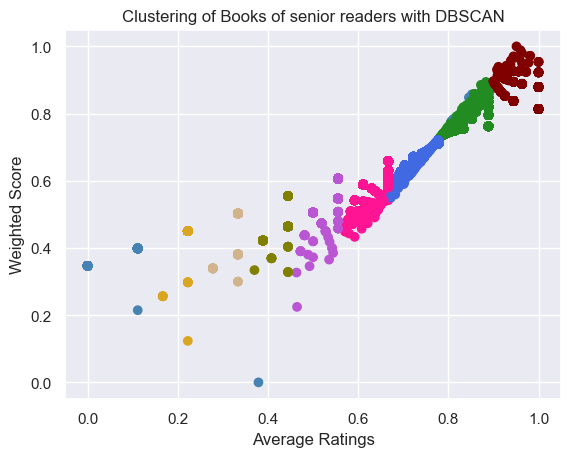

The silhouettescore with DBSCAN for the senior-readers books dataset: 0.98
The calinski harabasz score with DBSCAN for the senior-readers books dataset: 966663.83
The davies bouldin score with DBSCAN for the senior-readers books dataset: 0.54


In [129]:
all_books_df_s = book_ratings_w_s.copy()

def weighted_rating_all(df):
    v = df['ratings_count']
    R = df['avg_rating']
    C = df['avg_rating'].mean()
    m = df['ratings_count'].quantile(0.9)
    return (v/(v+m) * R) + (m/(m+v) * C)

all_books_df_s['weighted_score'] = weighted_rating_all(all_books_df_s)

model_df = pd.concat([rating_between_df_s, all_books_df_s['weighted_score'], all_books_df_s['avg_rating'], all_books_df_s['ratings_count']], axis=1)
model_df.head()

min_max_scaler = MinMaxScaler()
model_df_final = min_max_scaler.fit_transform(model_df)

model_dbscan_df = model_df_final.copy()

from sklearn.cluster import DBSCAN
DBSCAN_model = DBSCAN(eps=0.2, min_samples=120, algorithm='kd_tree')
DBSCAN_model.fit(model_dbscan_df)

#looks like unsupervised ML decides there are  genres
clusters_db_s = DBSCAN_model.labels_
print(np.unique(clusters_db_s))

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink',
          'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'orange', 'violet',
           'green', 'yellow', 'cyan', 'magenta', 'black', 'white', 'blue', 'steelblue']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(model_dbscan_df[:,-2], model_dbscan_df[:,-3], c=vectorizer(clusters_db_s))
plt.title("Clustering of Books of senior readers with DBSCAN")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_s_db = silhouette_score(model_dbscan_df,clusters_db_s)
cal_score_s_db = calinski_harabasz_score(model_dbscan_df, clusters_db_s)
davies_s_db = davies_bouldin_score(model_dbscan_df, clusters_db_s)
print("The silhouettescore with DBSCAN for the senior-readers books dataset:",np.round(sc_s_db,2))
print("The calinski harabasz score with DBSCAN for the senior-readers books dataset:",np.round(cal_score_s_db,2))
print("The davies bouldin score with DBSCAN for the senior-readers books dataset:",np.round(davies_s_db,2))



In [130]:
def book_recommendation_engine_dbscan_s(book_name):
    book_id = all_books_df_s[all_books_df_s['Book-Title'] == book_name ].index
    cluster_id = clusters_db_s[book_id][0]
    df_cl =pd.DataFrame(clusters_db_s,columns=['cl_id'])
    book_ids = df_cl[df_cl['cl_id']==cluster_id].index 
    books_picked = all_books_df_s.loc[book_ids]
    top_20_books_picked_dbscan = books_picked.sort_values(by ='weighted_score',ascending=False).head(20)
    recommended_books_dbscan = top_20_books_picked_dbscan[['Book-Title']]
    return recommended_books_dbscan.reset_index(drop=True)

books_rec_dbscan = book_recommendation_engine_dbscan_s('Prague : A Novel')
print(books_rec_dbscan)

                                           Book-Title
0                                            Contract
1         Unification (Star Trek The Next Generation)
2   Manifold Destiny: The One! the Only! Guide to ...
3   Chinese Lives: An Oral History of Contemporary...
4      Five-Finger Discount: A Crooked Family History
5                                    Monster: A Novel
6                     The Gospel According to the Son
7                                     Fugitive Pieces
8                     True Crime: The Novel/Cassettes
9                                          Jack Maggs
10   Space Is the Place: The Life and Times of Sun Ra
11                                   North of Montana
12                            The Last of the Savages
13                   Conceptual Physics (7th Edition)
14  FOOD : Mendel to Monsanto--The Promises and Pe...
15                                    The Whole Truth
16                                        Local rules
17                          

# KMeans Clustering of books of senior readers

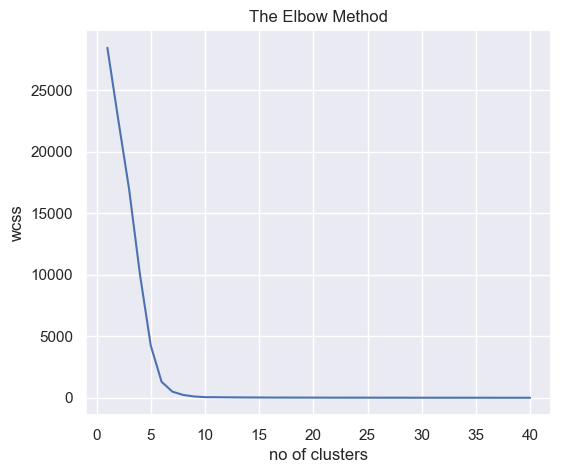

In [131]:
from sklearn.cluster import KMeans

# Elbow Method
score = []
x = model_df_final
for cluster in range(1,41):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

# plotting the score
plt.figure(figsize=(6, 5))
plt.plot(range(1,41), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

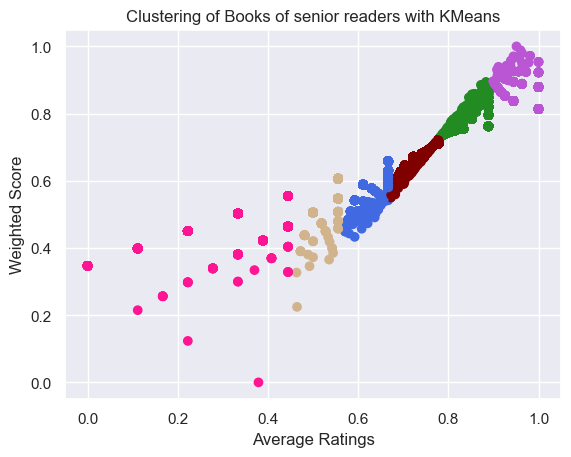

The silhouettescore with KMeans for the senior-readers books dataset: 0.94
The calinski harabasz score with KMeans for the senior-readers books dataset: 140141.86
The davies bouldin score with KMeans for the senior-readers books dataset: 0.35


In [132]:

kmeans_s = KMeans(n_clusters=6,init='k-means++', max_iter=500)
kmeans_s.fit(model_df_final)
kmeans_clusters_s = kmeans_s.labels_

plt.scatter(model_df_final[:,-2], model_df_final[:,-3], c=vectorizer(kmeans_clusters_s))
plt.title("Clustering of Books of senior readers with KMeans")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_s_km = silhouette_score(model_df_final,kmeans_clusters_s)
cal_score_s_km = calinski_harabasz_score(model_df_final, kmeans_clusters_s)
davies_s_km = davies_bouldin_score(model_df_final, kmeans_clusters_s)
print("The silhouettescore with KMeans for the senior-readers books dataset:",np.round(sc_s_km,2))
print("The calinski harabasz score with KMeans for the senior-readers books dataset:",np.round(cal_score_s_km,2))
print("The davies bouldin score with KMeans for the senior-readers books dataset:",np.round(davies_s_km,2))



In [133]:
def book_recommendation_engine_kmeans_s(book_name):
    # Normalize book titles for matching
    all_books_df_s['Book-Title'] = all_books_df_s['Book-Title'].str.strip().str.lower()
    book_name_normalized = book_name.strip().lower()
    

    
    # Find the book_id
    book_id = all_books_df_s[all_books_df_s['Book-Title'] == book_name_normalized].index
    
    # Debug: Print the book_id
    print(f"Book ID: {book_id}")
    
    # Check if book_id is empty
    if book_id.empty:
        print(f"Book title '{book_name}' not found in the dataset.")
        return pd.DataFrame()  # Return an empty DataFrame or handle it appropriately
    
    # Find the cluster_id
    cluster_id = kmeans_clusters_s[book_id[0]]
    df_cl = pd.DataFrame(kmeans_clusters_s, columns=['cl_id'])
    
    # Find all books in the same cluster
    book_ids = df_cl[df_cl['cl_id'] == cluster_id].index
    books_picked = all_books_df_s.loc[book_ids]
    
    # Sort and select top 20 books
    top_20_books_picked_kmeans = books_picked.sort_values(by='weighted_score', ascending=False).head(20)
    recommended_books_kmeans = top_20_books_picked_kmeans[['Book-Title']]
    return recommended_books_kmeans.reset_index(drop=True)

# Test the function with 'Monk\'s-hood'
books_rec_kmeans = book_recommendation_engine_kmeans_s("Monk's-hood")
print(books_rec_kmeans)


Book ID: Index([0], dtype='int64')
                                           Book-Title
0   one for the money (stephanie plum novels (pape...
1                                         the partner
2                                      summer sisters
3             along came a spider (alex cross novels)
4   into thin air : a personal account of the mt. ...
5                                          icy sparks
6                                  the survivors club
7                                          neverwhere
8   h is for homicide (kinsey millhone mysteries (...
9                           dude, where's my country?
10                                           icebound
11  d is for deadbeat (kinsey millhone mysteries (...
12                                           hideaway
13                   welcome to the world, baby girl!
14    simple abundance:  a daybook of comfort and joy
15                                         nightshade
16                                         open

# Agglomerative clustering of books of senior readers

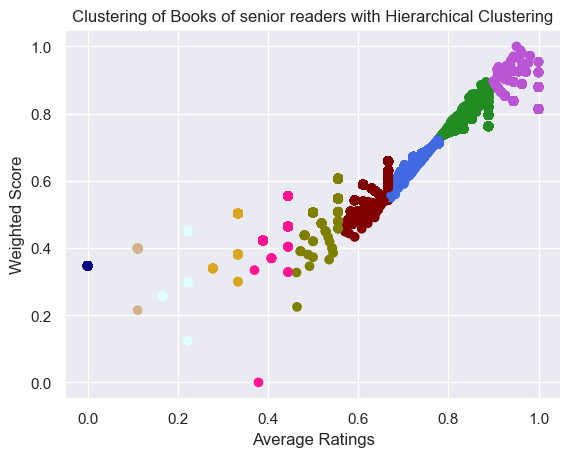

The silhouettescore with Agglomerative Clustering for the senior-readers books dataset: 0.98
The calinski harabasz score with Agglomerative Clustering for the senior-readers books dataset: 2036111.08
The davies bouldin score with Agglomerative Clustering for the senior-readers books dataset: 0.04


In [134]:
agglo_s = AgglomerativeClustering(n_clusters=10)
agglo_s.fit(model_df_final)
agglo_clusters_s = agglo_s.labels_

plt.scatter(model_df_final[:,-2], model_df_final[:,-3], c=vectorizer(agglo_clusters_s))
plt.title("Clustering of Books of senior readers with Hierarchical Clustering")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_s_agl = silhouette_score(model_df_final,agglo_clusters_s)
cal_score_s_agl = calinski_harabasz_score(model_df_final, agglo_clusters_s)
davies_s_agl = davies_bouldin_score(model_df_final, agglo_clusters_s)
print("The silhouettescore with Agglomerative Clustering for the senior-readers books dataset:",np.round(sc_s_agl,2))
print("The calinski harabasz score with Agglomerative Clustering for the senior-readers books dataset:",np.round(cal_score_s_agl,2))
print("The davies bouldin score with Agglomerative Clustering for the senior-readers books dataset:",np.round(davies_s_agl,2))


In [135]:
def book_recommendation_engine_agglo_s(book_name):
    # Strip leading/trailing spaces and convert to lowercase for case-insensitive matching
    book_name_cleaned = book_name.strip().lower()
    all_books_df_s['Book-Title-Cleaned'] = all_books_df_s['Book-Title'].str.strip().str.lower()
    
    # Check if the book exists in the DataFrame
    book_id = all_books_df_s[all_books_df_s['Book-Title-Cleaned'] == book_name_cleaned].index
    if book_id.empty:
        print(f"Book '{book_name}' not found in the dataset.")
        
        # Debugging: List similar book titles for further investigation
        similar_books = all_books_df_s[all_books_df_s['Book-Title-Cleaned'].str.contains(book_name_cleaned.split()[0])]['Book-Title']
        print("Here are some similar book titles in the dataset:")
        print(similar_books.head(10))
        return pd.DataFrame(columns=['Book-Title'])
    
    cluster_id = agglo_clusters_s[book_id[0]]
    df_cl = pd.DataFrame(agglo_clusters_s, columns=['cl_id'])
    book_ids = df_cl[df_cl['cl_id'] == cluster_id].index 
    books_picked = all_books_df_s.loc[book_ids]
    top_20_books_picked_agglo = books_picked.sort_values(by='weighted_score', ascending=False).head(20)
    recommended_books_agglo = top_20_books_picked_agglo[['Book-Title']]
    
    # Drop the temporary cleaned title column
    all_books_df_s.drop(columns=['Book-Title-Cleaned'], inplace=True)
    
    return recommended_books_agglo.reset_index(drop=True)

# Example usage
books_rec_agglo = book_recommendation_engine_agglo_s('The Constant Gardener')
print(books_rec_agglo)

                                           Book-Title
0                               dust to dust: stories
1   the death of common sense: how law is suffocat...
2                                  miracle in seville
3                                breaking the surface
4                                    the folding star
5                     who will run the frog hospital?
6   i took a lickin' and kept on tickin' (and now ...
7                                       nobody's fool
8        sahara unveiled: a journey across the desert
9                  angels &amp; insects: two novellas
10                                             enigma
11        a tidewater morning: three tales from youth
12                             dinner with persephone
13           mrs dalloway (everyman's library series)
14                                written on the body
15  promiscuities : the secret struggle for womanhood
16                           of love and other demons
17                          